In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as st
import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [2]:

def Plot_confusion_matrix(y_test_predictions,y_train_predictions):
    # Cria uma figura com dois subplots, um ao lado do outro
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Matriz de confusão no treinamento
    ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_predictions, ax=axes[0],cmap='viridis')
    axes[0].set_title('Matriz de Confusão no Treinamento')
    axes[0].set_xlabel('Valores Previstos')
    axes[0].set_ylabel('Valores Reais')

    # Matriz de confusão no teste
    ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_test_predictions, ax=axes[1],cmap='viridis')
    axes[1].set_title('Matriz de Confusão no Teste')
    axes[1].set_xlabel('Valores Previstos')
    axes[1].set_ylabel('Valores Reais')

    # Ajusta a visualização para evitar sobreposição de elementos
    plt.tight_layout()

    # Exibe a figura com os dois subplots
    plt.show()
    
def Plot_confusion_matrix_Normal(y_test_predictions,y_train_predictions):
    # Cria uma figura com dois subplots, um ao lado do outro
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Matriz de confusão no treinamento
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_predictions, ax=axes[0],cmap='viridis')
    axes[0].set_title('Matriz de Confusão no Treinamento')
    axes[0].set_xlabel('Valores Previstos')
    axes[0].set_ylabel('Valores Reais')

    # Matriz de confusão no teste
    ConfusionMatrixDisplay.from_predictions(y_teste, y_test_predictions, ax=axes[1],cmap='viridis')
    axes[1].set_title('Matriz de Confusão no Teste')
    axes[1].set_xlabel('Valores Previstos')
    axes[1].set_ylabel('Valores Reais')

    # Ajusta a visualização para evitar sobreposição de elementos
    plt.tight_layout()

    # Exibe a figura com os dois subplots
    plt.show()


import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models_label = []
models_accuracy = []
models_accuracy_teste = []
def computeAccuracyModels(models): 
    for model in models:
        formalism = type(model).__name__
        models_label.append(formalism)
        y_pred = []
        y_pred_teste = []
        try:
            y_pred_teste = [round(y_hat) for y_hat in model.predict(x_teste_balanced)]
        except:
            y_pred_teste = [round(y_hat[0]) for y_hat in model.predict(x_teste_balanced)]
        try:
            y_pred = [round(y_hat) for y_hat in model.predict(x_train_balanced)]
        except:
            y_pred = [round(y_hat[0]) for y_hat in model.predict(x_train_balanced)]
        models_accuracy.append(accuracy_score(y_true = y_train_balanced.values.ravel(), y_pred= y_pred))
        models_accuracy_teste.append(accuracy_score(y_true = y_test_balanced.values.ravel(), y_pred= y_pred_teste))
    df = pd.DataFrame({'model': models_label, 
                       'train_accuracy': models_accuracy,
                       'teste_acuracy': models_accuracy_teste
                       })
    print(" --------------------------- Acuracy for balanced models  --------------------------- ") 
    print(df.sort_values(by="train_accuracy", ascending = False))
    
models_label_normal = []
models_accuracy_normal = []
models_accuracy_normal_teste = []
def computeAccuracyModels_Normal(models): 
    for model in models:
        formalism = type(model).__name__
        models_label_normal.append(formalism)
        y_pred_normal = []
        y_pred_teste_normal = []
        try:
            y_pred_teste_normal = [round(y_hat) for y_hat in model.predict(x_teste)]
        except:
            y_pred_teste_normal = [round(y_hat[0]) for y_hat in model.predict(x_teste)]
        try:
            y_pred_normal = [round(y_hat) for y_hat in model.predict(x_train)]
        except:
            y_pred_normal = [round(y_hat[0]) for y_hat in model.predict(x_train)]
        models_accuracy_normal.append(accuracy_score(y_true = y_train.values.ravel(), y_pred= y_pred_normal))
        models_accuracy_normal_teste.append(accuracy_score(y_true = y_teste.values.ravel(), y_pred= y_pred_teste_normal))
    df = pd.DataFrame({'model': models_label_normal, 
                       'train_accuracy': models_accuracy_normal,
                       'teste_accuracy': models_accuracy_normal_teste
                       })
    print(" --------------------------- Acuracy for balanced models  --------------------------- ") 
    print(df.sort_values(by="train_accuracy", ascending = False))    
    
def grafico_qualitativa(var,dataframe, ax=None):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     
     if ax is None:
          fig, ax = plt.subplots(figsize=(12, 4))
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar', ax=ax)
     
     plt.xlabel('Valores')
     plt.ylabel('Counts')
     plt.title(f'Gráfico da Frequência: {var}')
 
def distribuição_de_Frequência(varName,dataframe):
    x = dataframe[varName]
    freq = x.value_counts(bins=20, 
                            sort=False)
    display(pd.DataFrame(freq))

def histograma(varName, dataframe):
    x = dataframe[varName]
    distribuição_de_Frequência(varName,dataframe)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sn.histplot(dataframe[varName], color='b', bins=20, ax=axs[0])
    dataframe[varName].plot(kind='box', ax=axs[1], title='')
    axs[1].set_ylabel(varName)
    plt.tight_layout()
    plt.show()
    
def QualiQualiAssociation(varName1, varName2,dataframe, ax=None):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = varName2  + " per " +  varName1 
    print(" ----------------- " + title + " ----------------- ")
    display(SQ_tb)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
    image.set_ylabel("Counts")
    image.set_xlabel(varName1) 
    
def moda_czuber(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    return moda     

def measuresOfPositionAndDispersion(data,key):
    dataset = pd.DataFrame({"Variavel": key ,"Quantidade": len(data),"Media": [st.mean(data.dropna())], "Moda ": moda_czuber(data.dropna()), "Mediana": [st.median(data.dropna())], "Variancia": [st.variance(data.dropna())], "Desvio padrao": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

def qualitativaXquantativa(varName1,varName2,dataframe,ax = None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)
    sn.boxplot(data=dataframe, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())
    
def scater(varName1,varName2,dataframe,ax = None):
    if ax is None:
         _, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(dataframe[varName1], dataframe[varName2])
    title = varName1 + " per " + varName2
    ax.set_title(title)
    ax.set_xlabel(varName1)
    ax.set_ylabel(varName2)    

def Plot_pred_train(y_pred, y_train):  
    y_predict = y_pred[:100]
    y_trained = y_train[:100]
    eixo_x = range(len(y_predict))  # Supondo um eixo X baseado no índice dos dados
    # Criando o gráfico
    plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
    plt.plot(eixo_x,y_trained, label='Dados Originais', color='blue', marker='o')  # Plotando os dados originais
    plt.plot(eixo_x,y_predict, label='Previsão', color='red', marker='x')  # Plotando a previsão em vermelho

    # Adicionando títulos e rótulos
    plt.title('Comparação entre Previsão e Dados Originais')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.legend()  # Adiciona legenda

    # Exibindo o gráfico
    plt.show()
    

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score, precision_score, recall_score
def printPerformanceMeasures(model):
    models_label = []
    formalism = type(model).__name__
    models_label.append(formalism)
    y_pred = []
    y_pred_teste = []
    try:
        y_pred_teste = [round(y_hat) for y_hat in model.predict(x_teste_balanced)]
    except:
        y_pred_teste = [round(y_hat[0]) for y_hat in model.predict(x_teste_balanced)]
    try:
        y_pred = [round(y_hat) for y_hat in model.predict(x_train_balanced)]
    except:
        y_pred = [round(y_hat[0]) for y_hat in model.predict(x_train_balanced)]
    df = pd.DataFrame({'model': models_label, 
                       'train_accuracy':  accuracy_score(y_true = y_train_balanced.values.ravel(), y_pred= y_pred),
                       'teste_acuracy':  accuracy_score(y_true = y_test_balanced.values.ravel(), y_pred= y_pred_teste),
                       'recall': recall_score(y_true=y_test_balanced.values.ravel(), y_pred=y_pred_teste),
                       'precision': precision_score(y_true=y_test_balanced.values.ravel(), y_pred=y_pred_teste)
                       })
    print(" --------------------------- Acuracy for balanced models  --------------------------- ") 
    display(df.sort_values(by="train_accuracy", ascending = False))

# Projeto de TI
Discente: Kaio Brasil da Silva  
Docente: Paulo Renato Alves Firmino  
Disciplina: Estatística Computacional  
Curso: Matemática Computacional

# Introdução 
Este projeto dedica-se a analisar um conjunto de dados de um hospital, referente a pacientes que estão internados na UTI. Os dados foram obtidos através do Kaggle, uma plataforma de competição de ciência de dados (https://www.kaggle.com/competitions/patient-survival-prediction/data?select=test.csv).  
A base de dados dispõe de informações de exames dos pacientes, contendo por exemplo: diagnósticos para saber se o paciente tem diabetes; biópsia para verificar se o paciente possui algum tumor, além de aferições como temperatura, frequência respiratória, etc. Além disso, dados como idade, peso, índice de massa corporal, dentre outras medidas, também estão contidas no referido conjunto de dados.  
A maioria das variáveis contidas no dataset possui grande relação com o sistema de pontuação APACHE III (Acute Physiology and Chronic Health Evaluation). Sistemas de pontuação como o APACHE, são extremamente importantes para a enfermagem. Eles auxiliam enfermeiros de prática avançada (APNs) e médicos a determinar a gravidade da condição do paciente, conforme necessário. Essas variaveis pontuam no sistema APACHE III e quanto maior a pontuação mais grave é a situação do paciente na UTI.   
Dessa maneira, o objetivo principal desse projeto é buscar prever a mortalidade dos pacientes que estão na UTI, obtendo assim, previsões sobre condições dos pacientes que levam a morte. Para tais previsões, foram construídos modelos de machine learning, com avaliação de desempenho.

# 2. Pré-processamento

O pré-processamento é destinado a organização, estruturação e preparação do conjunto de dados para obter informação, ou seja, transformar dados brutos em dados úteis, que servirão para análises descritivas e inferenciais.

## 2.2. Análise descritiva dos dados

* A tabela abaixo é o nosso dataset tirado da plataforma kaglee.  
É possivel ver que são dados números e que contém diversas informações sobre cada pacienteccomo exames, condições e caracteristicas.  
A partir dessas informações é possivel ter uma visão mais geral e descritiva dos dados que é o que será feito nos passos seguintes.

In [3]:
nome_arquivo_csv = 'train.csv'
dados = pd.read_csv(nome_arquivo_csv)
dados = dados.iloc[:, 4:]
dados.head(5)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66.0,35.693127,0,Caucasian,F,152.4,Accident & Emergency,836,transfer,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
1,48.0,18.966902,0,African American,F,165.1,Accident & Emergency,794,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,1
2,76.0,19.278960,0,Caucasian,M,173.0,Accident & Emergency,608,readmit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
3,43.0,45.617284,0,Caucasian,M,180.0,Floor,490,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary,NaN,0
4,86.0,26.756678,0,Caucasian,F,154.9,Accident & Emergency,547,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1


Conforme dito anteriormente, é necessário fazer uma análise descritiva dos dados para obtermos informações relevantes dos nossos dados.  
Assim, está listado abaixo, as principais variáveis qualitativas de interesse e como estas se relacionam com nossa variável depedente ("hospital_death"):  
* __gender__: O sexo genético do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização.
* __bmi_quali__ : Índice de massa corporal dividido em categorias. 
* __cirrhosis__:  Se o paciente tem histórico de uso pesado de álcool com hipertensão portal e varizes, outras causas de cirrose com evidência de hipertensão portal e varizes ou cirrose comprovada por biópsia. Esta comorbidade não se aplica a pacientes com transplante de fígado funcionante.                     
* __hepatic_failure__:  Se o paciente tem cirrose e complicações adicionais, incluindo icterícia e ascite, sangramento gastrointestinal superior, encefalopatia hepática ou coma.                
* __immunosuppression__: Se o paciente teve seu sistema imunológico suprimido nos seis meses anteriores à admissão na UTI por algum dos seguintes motivos; radioterapia, quimioterapia, uso de drogas imunossupressoras não citotóxicas, esteróides em altas doses (pelo menos 0,3 mg/kg/dia de metilprednisolona ou equivalente por pelo menos 6 meses).
* __ventilated_apache__: Se o paciente foi ventilado de forma invasiva no momento da gasometria arterial com pontuação mais alta usando o algoritmo de pontuação de oxigenação, incluindo qualquer modo de ventilação com pressão positiva fornecida através de um circuito conectado a um tubo endotraqueal ou traqueostomia.      
* __intubated_apache__: Se o paciente foi intubado no momento da gasometria arterial de maior pontuação usada no escore de oxigenação.
 
O intuito de selecionar essas varáveis qualitativas é para inferir se o gênero, as doenças e o local de onde os pacientes foram admitidas tem relação com a morte, por exemplo.

__VARIAVEIS DE APACHE-III__
  
 Além disso, foram selecionadas algumas variáveis quantitativas de interesse, para também inferir se estas tem relação com a variável dependente. Algumas variáveis escolhidas tem relação direta com o diagnóstico APACHE-III, que é um sistema de pontuação que avalia a gravidade da doença e a mortalidade dos pacientes internados em UTI.

* __heart_rate_apache__: A frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __temp_apache__: A temperatura medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __resprate_apache__: A frequência respiratória medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __map_apache__: A pressão arterial média medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
__apache_4a_hospital_death_prob__: A previsão probabilística APACHE IVa de mortalidade no hospital para o paciente que utiliza o escore APACHE III e outras covariáveis, incluindo diagnóstico.

Ainda com o foco nas variáveis, uma análise interessante é sobre a correlação entre variáveis quantitativas. Pra isso, utilizamos o Coeficiente de Correlação de Pearson.  
Para isso, foi necessário retirar as variáveis qualitativas do nosso conjunto de dados.  
A correlação de Pearson é um teste estatístico que mede a relação entre duas variáveis quantitativas. Seu valor está contido em um intervalo de -1 a +1.  
Um valor = 0 indica que não há associação linear entre as duas variáveis. Um valor > 0 indica que a medida que uma variável aumenta, a outra variável também aumenta, isto é, há uma associação positiva entre as variáveis. Por fim, um valor <0 indica associação negativa entre as variáveis, ou seja, a medida que uma variável aumenta, a outra variável diminui.  
* Nesse caso, com a análise da matriz de correlação de Pearson, foi possível identificar as variáveis quantitativas mais relevantes com a variável "hospital_death", que é a variável dependente deste projeto.

In [4]:
pd.set_option('display.max_rows',20)
data = dados.copy()
columns=['ethnicity',  'gender',  'icu_stay_type', 'icu_type', 'icu_admit_source', 'apache_3j_bodysystem', 'apache_2_bodysystem']
data.drop(columns, axis=1, inplace=True)
corr_matrix = data.corr()
corr_matrix["hospital_death"].sort_values(ascending=False).head(10)


hospital_death                   1.000000
apache_4a_hospital_death_prob    0.306263
apache_4a_icu_death_prob         0.280134
ventilated_apache                0.224943
intubated_apache                 0.170951
d1_heartrate_max                 0.162343
h1_resprate_max                  0.124165
h1_heartrate_max                 0.116115
h1_resprate_min                  0.114754
age                              0.112779
Name: hospital_death, dtype: float64

### Variáveis Qualitativas

* A partir do gráfico de mortes no hospital abaixo é possivel observar que somente uma pequena parte dos pacientes do hospital foram a obito sendo somente 0,09%.  
Isto indica um grande desbalanço no conjunto ja que a grande maioria dos pacientes permaneceram vivos.


,hospital_death,Frequência
0,0,0.913706
1,1,0.086294


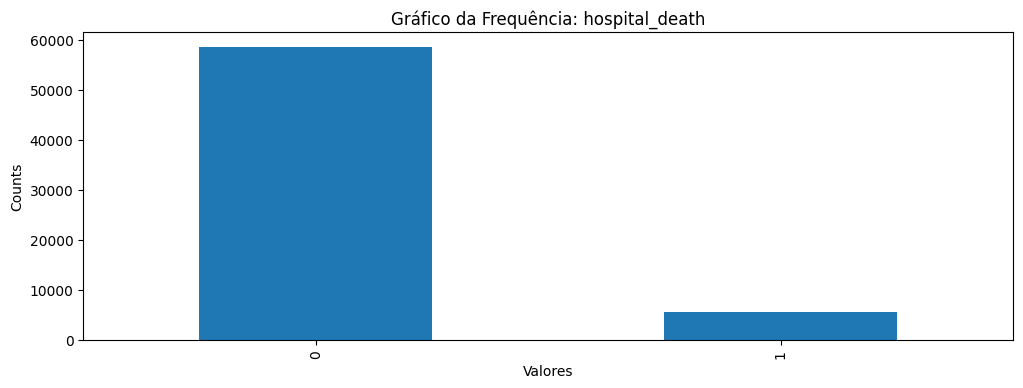

In [5]:
grafico_qualitativa("hospital_death", dados)

* Ao analisarmos as condições de sexo por morte dos pacientes é possivel ver que não existe grande correlação entre estas duas variáveis.  
Os paciente em pequena maioria são homens(apenas 7% maior) e esta maioria não influência nas mortes dos paciente ja que o percentual de mortes por genêro feminino é de 8,81% e por genêro masculino é de 8,47%.

,gender,Frequência
0,M,0.538973
1,F,0.461027


 ----------------- hospital_death per gender ----------------- 


hospital_death,0,1
gender,,
F,0.911899,0.088101
M,0.915303,0.084697


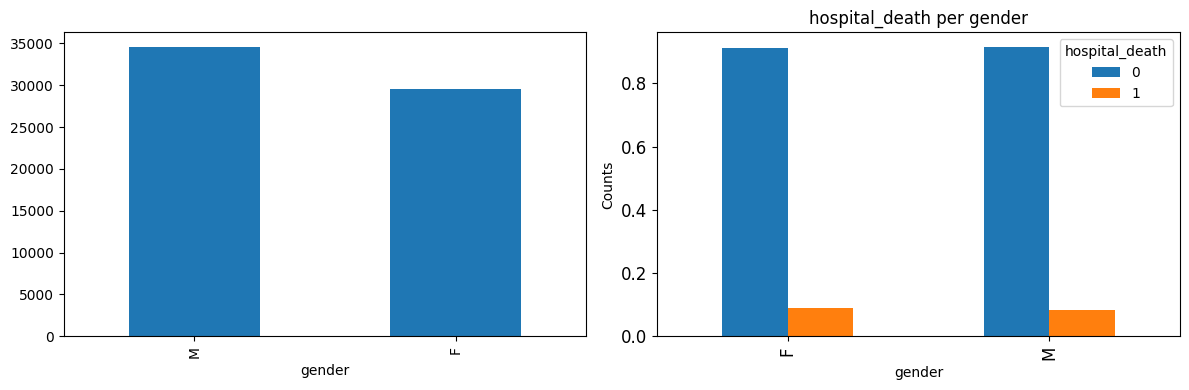

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("gender", dados, axs[0])
QualiQualiAssociation("gender","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Diante do gráficoabaixo dos pacientes diagnosticados com leucemia vemos que somente 0,69% dos pacientes foram diagnosticados com essa condição, porém na análise do gráfico bivariado vemos uma interferência significativa na mortalidade.
Os pacientes que não foram diagnosticados com leucemia tem somente 8.53% na taxa de mortalidade enquanto os pacientes diagnosticados com leucemia tem 18.06% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.
Assim, pela análise obtida vemos que leucemia é uma variável de maior interesse por impactar na taxa de mortalidade.

,leukemia,Frequência
0,0.0,0.993044
1,1.0,0.006956


 ----------------- hospital_death per leukemia ----------------- 


hospital_death,0,1
leukemia,,
0.0,0.914664,0.085336
1.0,0.819413,0.180587


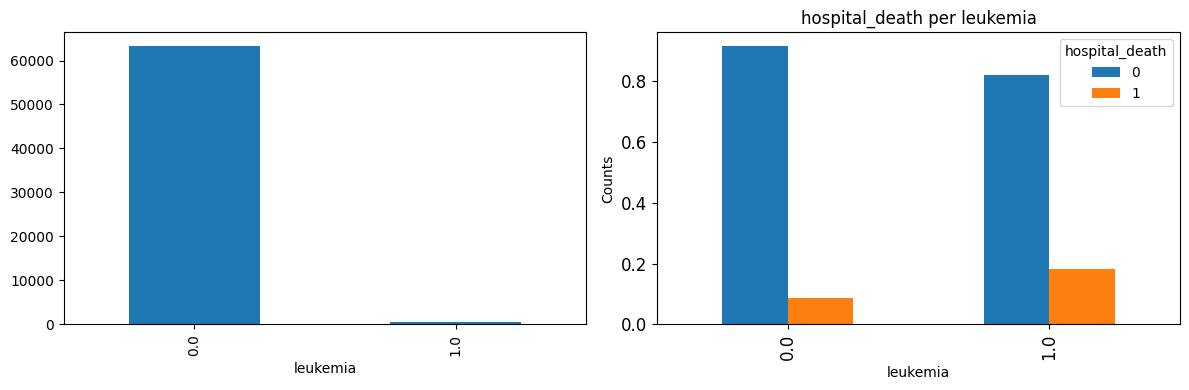

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("leukemia", dados, axs[0])
QualiQualiAssociation("leukemia","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise do gráfico univariado abaixo de pacientes com diabetes vemos que uma quantidade de 22.40% possuem a doença enquanto 77.60% não possuem essa condição.  
Contudo, no gráfico bivariado vemos que a diabetes não tem grande inteferência na taxa de mortalidade. Dos pacientes que morreram 8.83% não possuiam a doença enquanto 7.79% possuiam a doença.
Sendo assim, pela análise obtida vemos que a diabetes não é uma variável de interesse pois mesmo com uma população considerável de diagnosticos positivos de pacientes vemos que ela não interfere na taxa de mortalidade.

,diabetes_mellitus,Frequência
0,0.0,0.775967
1,1.0,0.224033


 ----------------- hospital_death per diabetes_mellitus ----------------- 


hospital_death,0,1
diabetes_mellitus,,
0.0,0.911653,0.088347
1.0,0.922133,0.077867


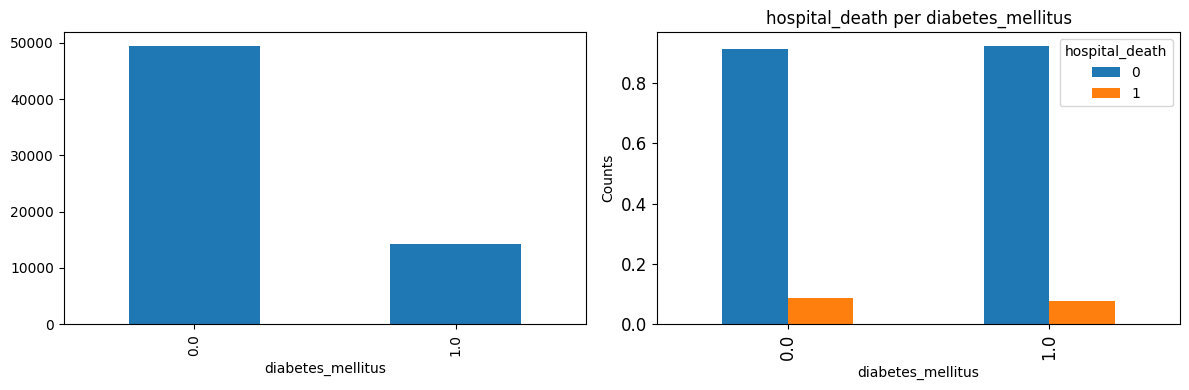

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("diabetes_mellitus", dados, axs[0])
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

Na análise univariada abaixo dos pacientes que possuem ou não tumor sólido com metástase vemos que somente 2.04% possuem a doença enquanto 97,95% não possuem essa condição.
Porém, na análise bivariada vemos que este tumor possui uma grande interferência na taxa de mortalidade.
Os pacientes que não foram diagnosticados com tumor sólido com metástase tem somente 8.40% na taxa de mortalidade enquanto os pacientes diagnosticados com tumor sólido com metástase tem 17.96% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.
Logo, pela análise obtida podemos ver que tumor sólido com metástase é uma variável de maior interesse por impactar na taxa de mortalidade.

,solid_tumor_with_metastasis,Frequência
0,0.0,0.979541
1,1.0,0.020459


 ----------------- hospital_death per solid_tumor_with_metastasis ----------------- 


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.915956,0.084044
1.0,0.820414,0.179586


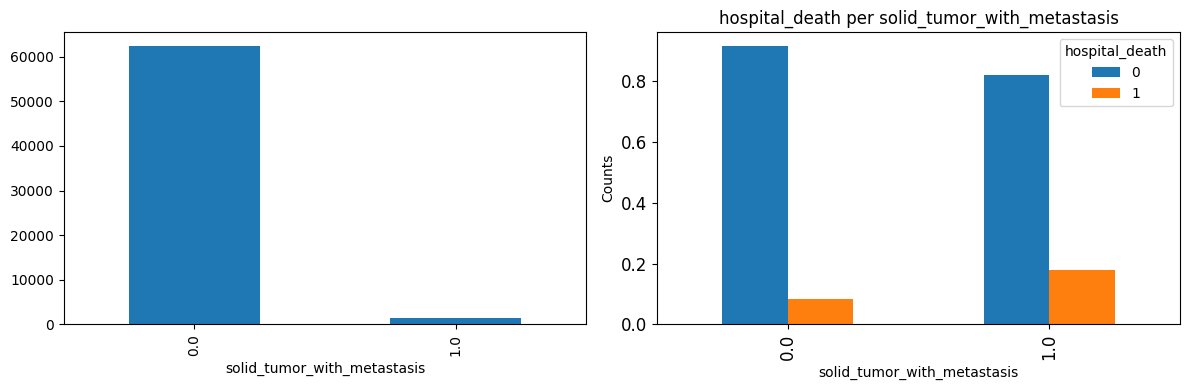

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("solid_tumor_with_metastasis", dados, axs[0])
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada abaixo de localização do paciente antes de ser admitido na unidade vemos que a grande maioria dos pacientes vem da emergência e que a minoria vem de outras UTI´s e de outris hospital.   
Porém, na análise bivariada vemos que na taxa de mortalidade essas porcentagens se alteram.   
A localização que possui a maior porcentagem de mortalidade é dos pacientes vindos de outra UTI com 14.28% seguido por os pacientes vindos de outro hospital com 12.59% seguido por floor que possui 13.70%.    
Enquanto, a localização que possui a menor porcentagem de mortalidade é dos pacientes vindos sala de operação e recuperação com 03.69% e depois acidente e emergência com 08.60%.    
Portanto, podemos ver que os pacientes vindos de outra UTI e de outro hospital são as localizações de maior interesse por ter maior relação com a mortalidade.

,icu_admit_source,Frequência
0,Accident & Emergency,0.590904
1,Operating Room / Recovery,0.203472
2,Floor,0.170516
3,Other Hospital,0.025391
4,Other ICU,0.009717


 ----------------- hospital_death per icu_admit_source ----------------- 


hospital_death,0,1
icu_admit_source,,
Accident & Emergency,0.914007,0.085993
Floor,0.862984,0.137016
Operating Room / Recovery,0.963054,0.036946
Other Hospital,0.874079,0.125921
Other ICU,0.857143,0.142857


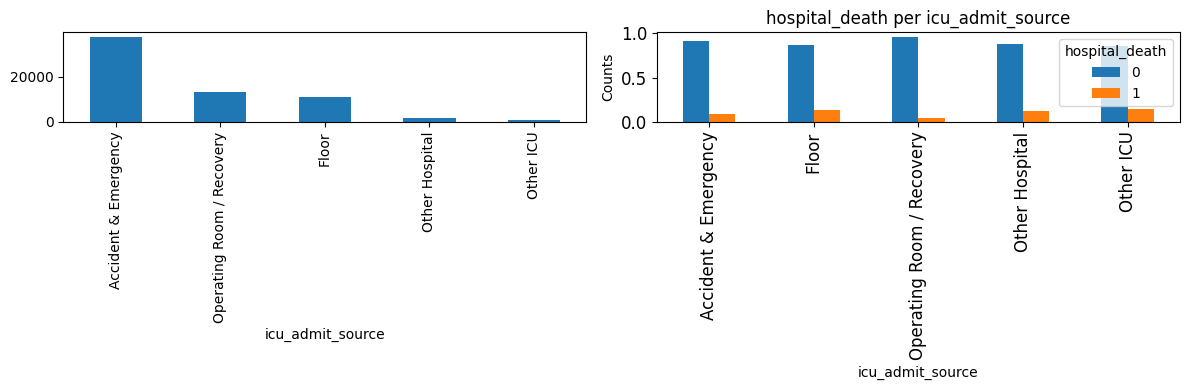

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("icu_admit_source", dados, axs[0])
QualiQualiAssociation("icu_admit_source","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise dos pacientes que possurm falha hepática vemos que somente 1,29% dos pacientes internados possuem essa condição.  
Porém essa condição impacta na taxa de mortalidade, estes que pacientes que possuem falha hepatica tem 10% a mais de contribuição na mortandade do hospital do que aqueles que não possuem essa condição.

,hepatic_failure,Frequência
0,0.0,0.987062
1,1.0,0.012938


 ----------------- hospital_death per hepatic_failure ----------------- 


hospital_death,0,1
hepatic_failure,,
0.0,0.915324,0.084676
1.0,0.813107,0.186893


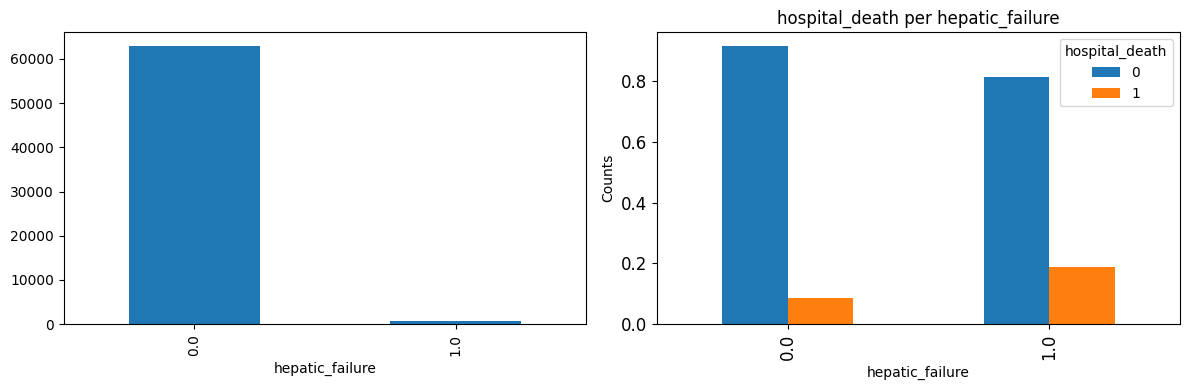

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("hepatic_failure", dados, axs[0])
QualiQualiAssociation("hepatic_failure","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

*Na análise dos pacientes que possuem cirrose vemos que é somente uma pequena porcentagem que possui essa condição.  
Mas vemos no gráfico bivariado que essa condição tem grande impacto nas mortes do hospital sendo 10% maior a taxa de pacientes que morreram e que possuiam cirrose.

,cirrhosis,Frequência
0,0.0,0.984377
1,1.0,0.015623


 ----------------- hospital_death per cirrhosis ----------------- 


hospital_death,0,1
cirrhosis,,
0.0,0.915539,0.084461
1.0,0.817085,0.182915


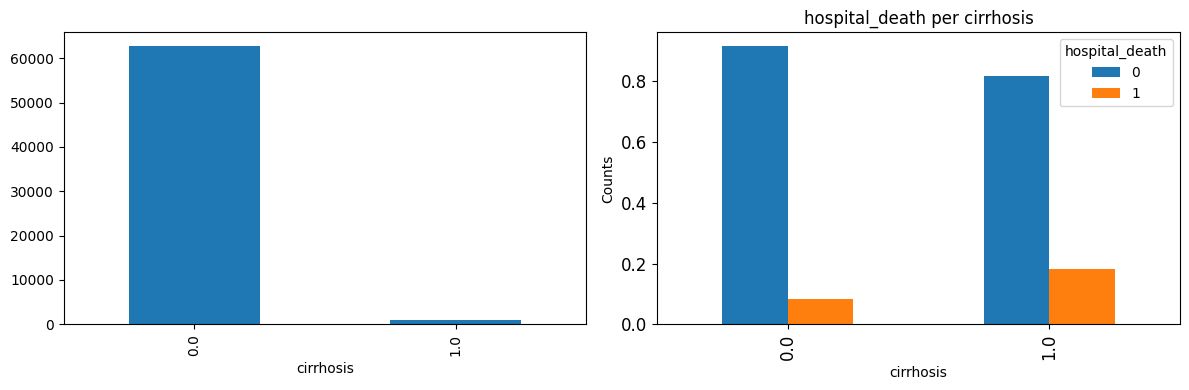

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("cirrhosis", dados, axs[0])
QualiQualiAssociation("cirrhosis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Ao análisarmos os pacientes que tem imunosupressão vemos que a porcentagem desses pacientes tambem é bem pequena.   
Somente 2.60% dos pacientes possuem essa condição mas ao anarlisarmos o quanto esta condição impacta na morte vemos que este impacto é consideravel.  
Dos pacientes que foram a óbito, 15.62% possuíam imunossupressão, enquanto 8.41% não tinham imunossupressão.

,immunosuppression,Frequência
0,0.0,0.973966
1,1.0,0.026034


 ----------------- hospital_death per immunosuppression ----------------- 


hospital_death,0,1
immunosuppression,,
0.0,0.915878,0.084122
1.0,0.843788,0.156212


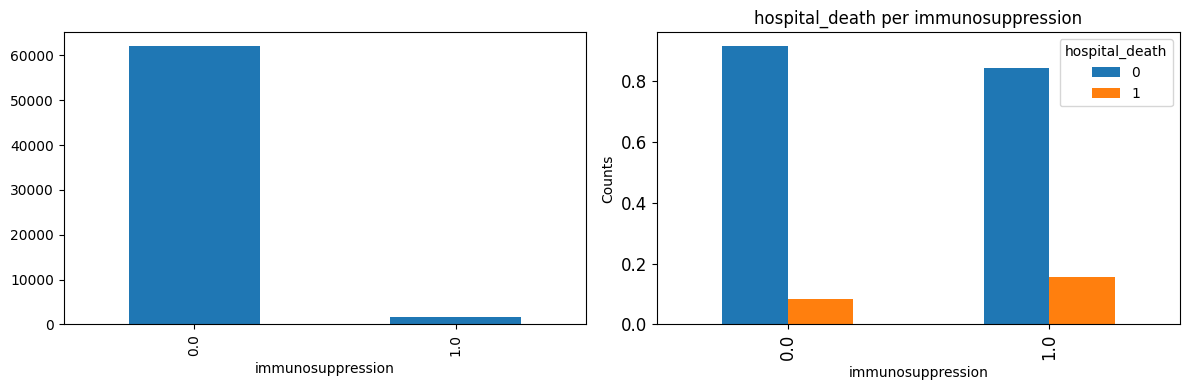

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("immunosuppression", dados, axs[0])
QualiQualiAssociation("immunosuppression","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()


* Já na análise dos pacientes que foram submetidas a ventilação invasiva vemos que tem uma quantidade considerável de pacientes submetidos.  
32.58% dos pacientes receberam ventilação invasiva, enquanto 67,42% não receberam e esta condição tem grande impacto na mortalidade.  
Dos pacientes que morreram 17.67% foram submetidos a ventilação invasiva enquanto  4.22% que não foram submetidas a ventilação invasiva, ou seja, os pacientes que foram submetidos a ventilação invasiva tem aproximadamente 13% a mais na taxa de mortalidade.


,ventilated_apache,Frequência
0,0.0,0.674172
1,1.0,0.325828


 ----------------- hospital_death per ventilated_apache ----------------- 


hospital_death,0,1
ventilated_apache,,
0.0,0.957844,0.042156
1.0,0.823286,0.176714


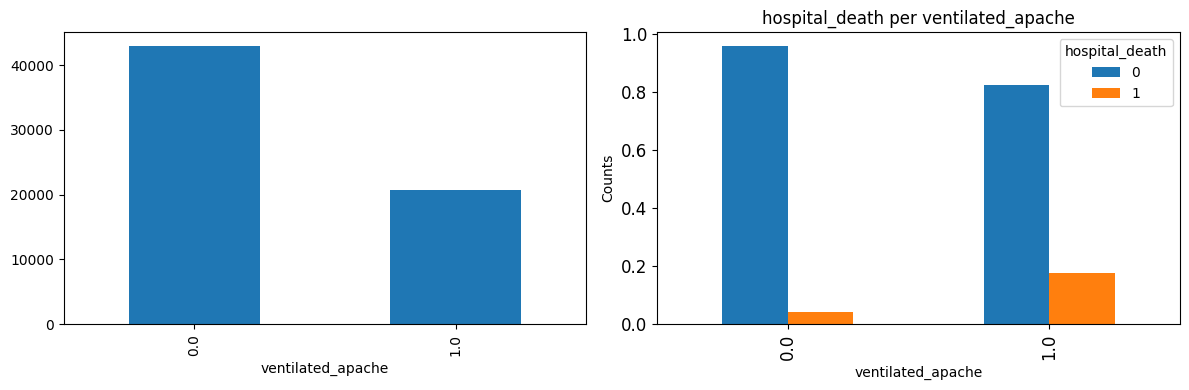

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("ventilated_apache", dados, axs[0])
QualiQualiAssociation("ventilated_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já na análise dos pacientes que foram intubados vemos que uma porcentagem considerável de 15.18% foram submetidos a esse tratamento.    
No gráfico bivarido vemos que dos pacientes que foram a óbito, 6.57% não estavam em intubação enquanto 19.93% estavam intubados o que mostra que essa condição tem grande impacto na morte.


,intubated_apache,Frequência
0,0.0,0.848164
1,1.0,0.151836


 ----------------- hospital_death per intubated_apache ----------------- 


hospital_death,0,1
intubated_apache,,
0.0,0.934280,0.065720
1.0,0.800724,0.199276


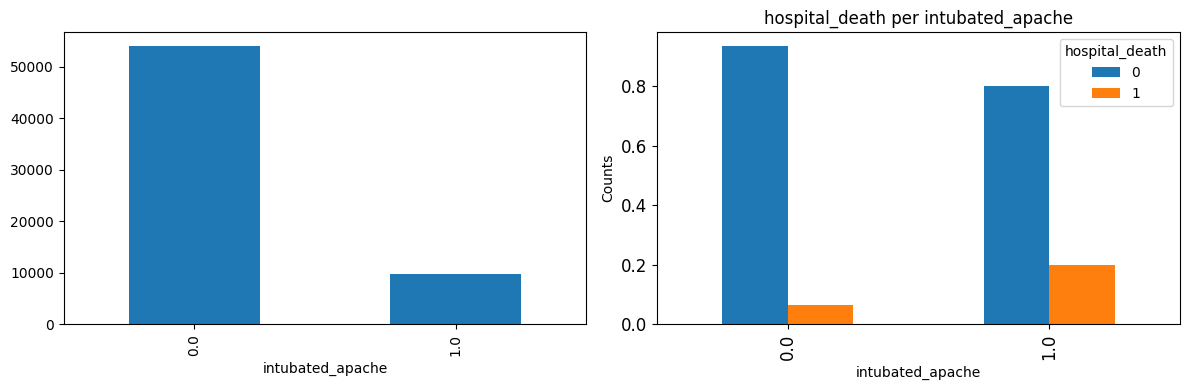

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("intubated_apache", dados, axs[0])
QualiQualiAssociation("intubated_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

### Variáveis Quantitativas

* No gráfico univariado e na distribuição de frequência abaixo de frequência cardíaca há uma grande concentração entre 45 e 60 bpm, mas que a maior concentração encontra-se entre 90 e 130bpm.    
O gráfico em boxplot nos mostra que as medidas abaixo de 40 bpm e acima de 170 bpm já são considerados pontos aberrantes.
Os valores esperados podem ser análisados de duas formas.   
Apartir das medidas de posição e dispersão vemos que a maioria dos pacientes estão acima dos 60 anos, portanto a frequência cardíaca esperada é entre 45 a 90 bpm.   
O Ministério da Saúde estabeleceu valores normais de referência entre 60 e 90 bpm.   
Assim, pela análise dessas duas referências podemos perceber que a frequência cardica dos pacientes em geral está bastante elevada e também que não há muitos pacientes que estão dentro do intervalo considerado normal para frequência cardíaca.

,count
"(29.851, 37.4]",914
"(37.4, 44.8]",1376
"(44.8, 52.2]",3935
"(52.2, 59.6]",5026
"(59.6, 67.0]",3297
"(67.0, 74.4]",330
"(74.4, 81.8]",166
"(81.8, 89.2]",2413
"(89.2, 96.6]",6215
"(96.6, 104.0]",8853


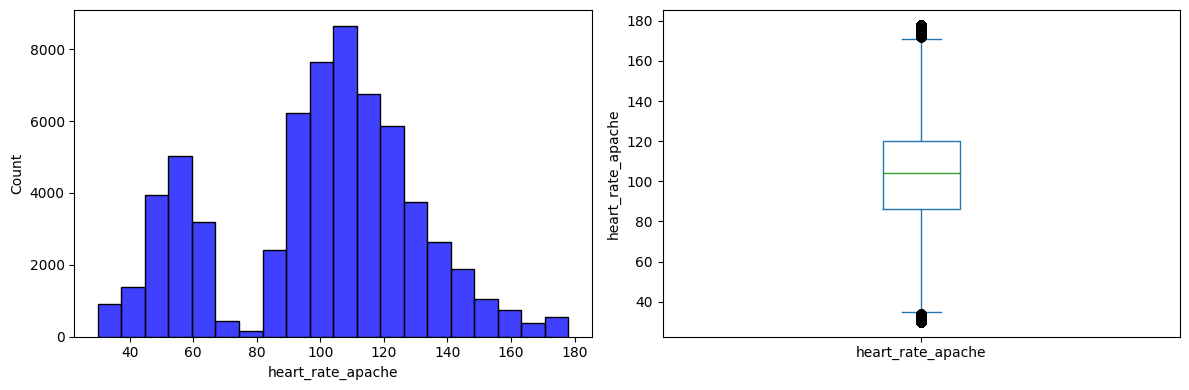

In [16]:
histograma("heart_rate_apache",dados)

* Análisando o grafico bivariado abaixo de frequência cardiaca das pessoas por morte e por probabilidade de morte obtemos dados interessantes.  
Os pacientes que vieram a obito tiveram uma frequência cardiaca maior e isso é observado tanto no gráfico boxplot(à direita) quanto na tabela.  
Estes pacientes tem uma media mais elevada com aproximadamente 12 pontos a mais daqueles que não vieram a obito.  
 Além disso, no gráfico podemos ver que os pacientes que morreram não possuem pontos aberrantes para cima.  
Nas duas categorias de pacientes observamos que amédia de frequência cardiaca era acima dos valores de referência.  
No gráfico de disperssão(á esquerda) vemos o gráfico quase que inteiramente preenchido a não ser por um buraco entre 65 e 85 de frequência cardiaca.

heart_rate_apache                                            \
                           count        mean        std   min   25%    50%   
hospital_death                                                               
0                        58109.0   98.615739  30.339018  30.0  84.0  103.0   
1                         5465.0  110.411528  34.149646  30.0  96.0  115.0   

                              
                  75%    max  
hospital_death                
0               118.0  178.0  
1               133.0  178.0

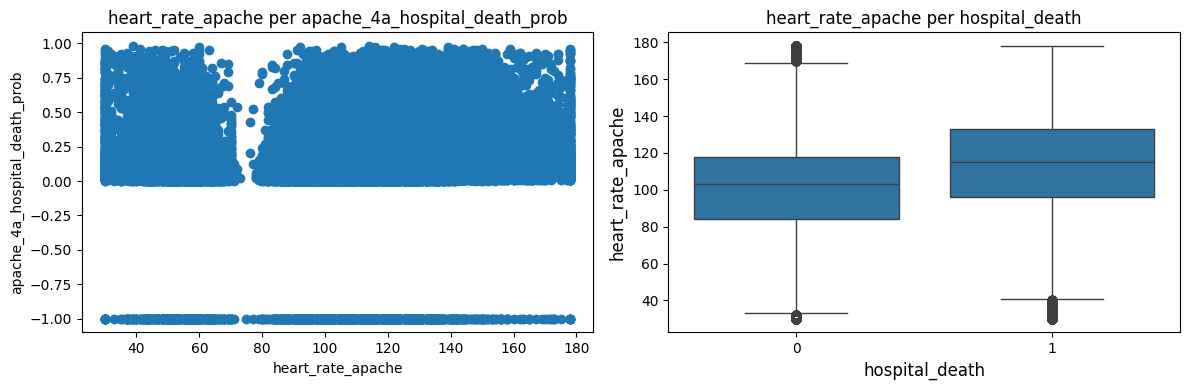

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("heart_rate_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("heart_rate_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

--> Análise entre "hospital_death" e "map_apache"
- No histograma e na distribuição de frequência abaixo de pressão arterial percebemos que a maioria dos pacientes estão entre 40 e 80 de pressão arterial e que os outros estão distribuidos ao longo de de 110 a 200;     
- O boxplot não possui pontos aberrantes e o grafico de barras nos mostra que a grande concentração de pessoas esta entre 40 e 60;  

,count
"(39.839000000000006, 48.0]",9356
"(48.0, 56.0]",10427
"(56.0, 64.0]",9973
"(64.0, 72.0]",6080
"(72.0, 80.0]",2015
"(80.0, 88.0]",180
"(88.0, 96.0]",52
"(96.0, 104.0]",658
"(104.0, 112.0]",2563
"(112.0, 120.0]",4101


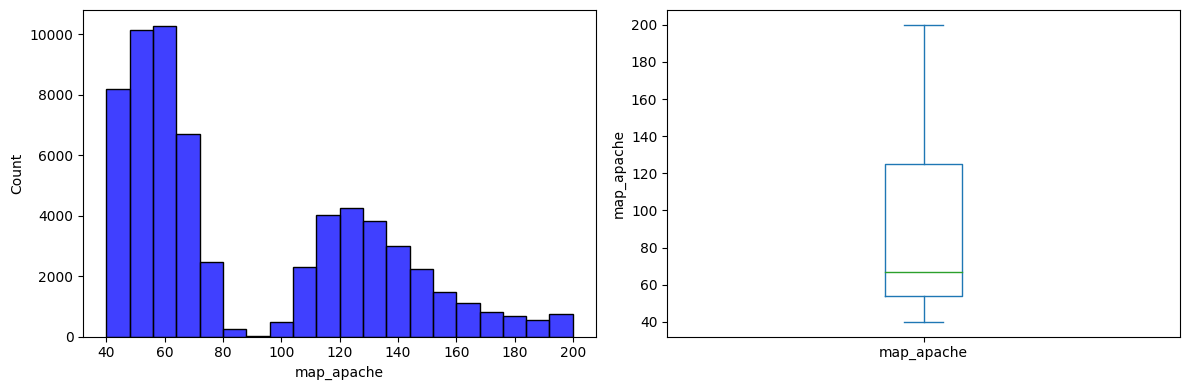

In [18]:
histograma("map_apache",dados)

* Na análise do gráfico bivariado abaixo de pressão arterial obtemos melhores informações, no gráfico boxplot ainda não há pontos aberrantes no entanto vemos que os pacientes que vieram a obito possuem pressão arterial menos elevada em comparação as pessoas que não vieram a obito.  
Os pacientes que morreram possuem 6 pontos de media menor.  
No gráfico à direita vemos que pacientes que tem pressão arterial entre 75 e 115 possuem uma baixa probabilidade de morte  enquanto valores diferente destes estão preenchendo todo o gráfico.

map_apache                                                 \
                    count       mean        std   min   25%   50%    75%   
hospital_death                                                             
0                 58036.0  88.649648  41.466745  40.0  55.0  67.0  124.0   
1                  5450.0  82.393578  47.850038  40.0  45.0  57.0  128.0   

                       
                  max  
hospital_death         
0               200.0  
1               200.0

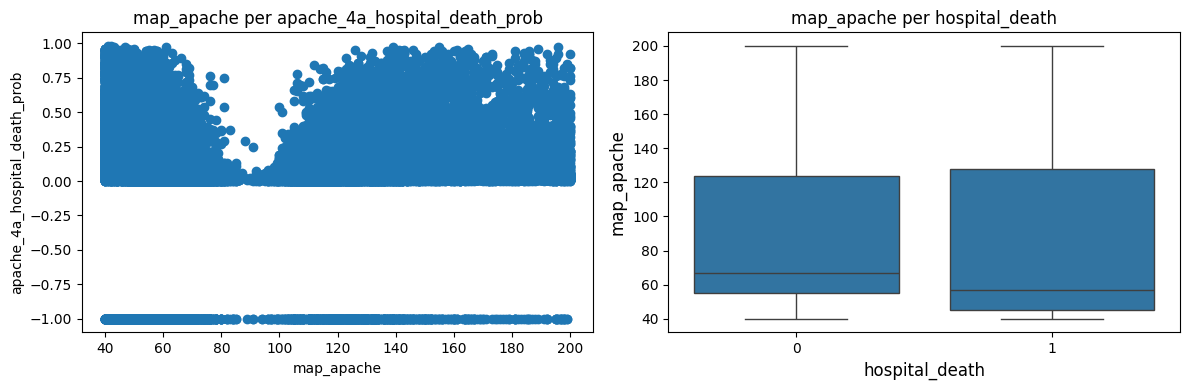

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("map_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("map_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

--> Análise entre "hospital_death" e "temp_apache"  
- No histograma e na distribuição de frequência de temperatura percebemos uma grande concentração entre 36 e 37 e vários pontos aberrantes;   
- A temperatura esperada tanto para pacientes idosos quanto pelo ministério da saúde é entre 36,1ºC e 37,2ºC. Portanto, vemos que a maioria dos pacientes estão com temperaturas consideradas normais;   
- Na análise do gráfico bivariado de pressão arterial obtemos melhores informações: no gráfico boxplot ainda não há pontos aberrantes, no entanto, vemos que os pacientes que foram a óbito possuem pressão arterial menos elevada em comparação as pessoas que não morreram;    
- No gráfico à direita vemos que pacientes que tem pressão arterial entre 75 e 115 possuem uma baixa probabilidade de morte, enquanto valores diferentes destes estão preenchendo todo o gráfico.

,count
"(32.091, 32.48]",471
"(32.48, 32.86]",191
"(32.86, 33.24]",144
"(33.24, 33.62]",152
"(33.62, 34.0]",214
"(34.0, 34.38]",201
"(34.38, 34.76]",518
"(34.76, 35.14]",759
"(35.14, 35.52]",1555
"(35.52, 35.9]",5246


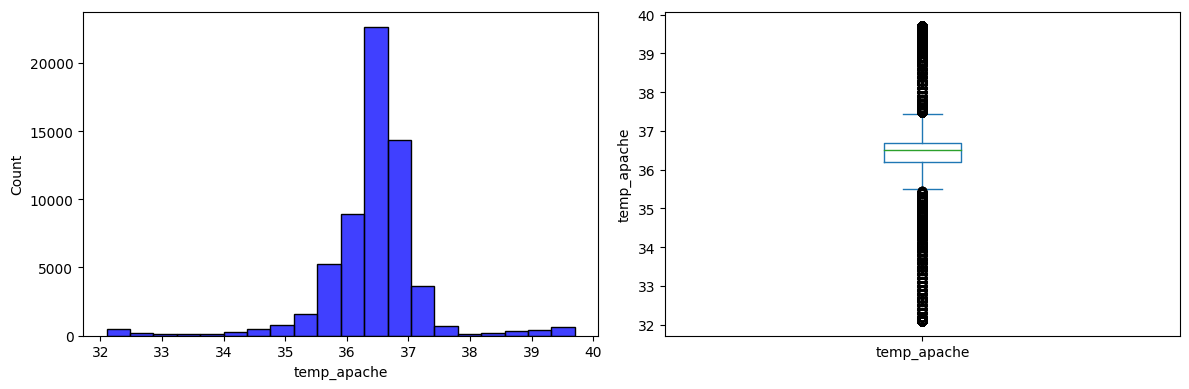

In [20]:
histograma("temp_apache",dados)

- Na análise do gráfico bivariado abaixo de temperatura percebemos que os pacientes que foram a óbito tem valores de média abaixo do nivel de referência sendo uma temperatura considerada baixa;  
- Percebemos que o boxplot daqueles que morreram é mais cheio e tem pontos aberrantes mais distantes, mo boxplot daqueles que não foram a óbito há maior diversidade de pontos aberrantes;    
- No gráfico de disperssão vemos que pacientes com temperatura elevadas como 38 a 39 possuem menor probabilidade de morrer.

temp_apache                                                  
                     count       mean      std   min   25%   50%   75%   max
hospital_death                                                              
0                  56199.0  36.453325  0.74005  32.1  36.2  36.5  36.7  39.7
1                   5130.0  35.990957  1.44767  32.1  35.6  36.3  36.7  39.7

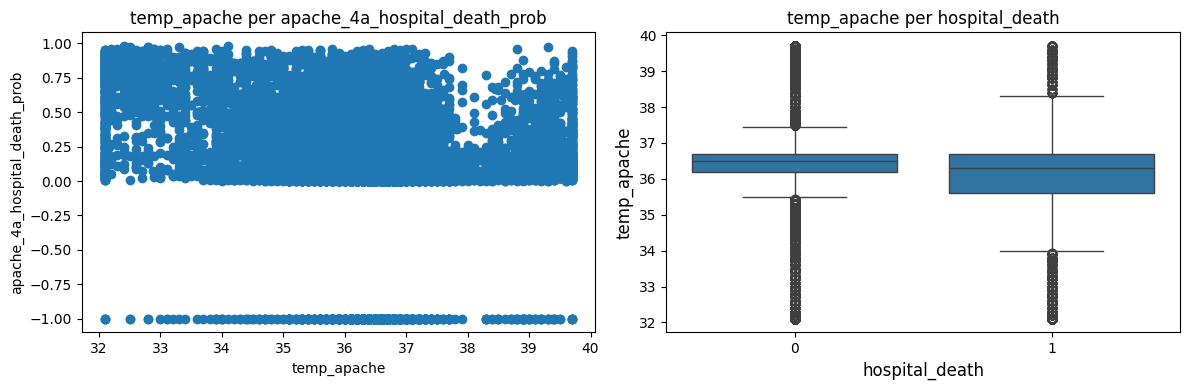

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("temp_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("temp_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

--> Análise entre "hospital_death" e "resprate_apache"  
- No histograma e na distribuição de frequência de frequêcia respiratória percebemos dois grandes pontos de concentração entre 5 e 15 e entre 25 e 40;    
- Observamos também que no gráfico boxplot não há pontos aberrantes;   
- A frequência respiratoria considerada normal no nosso grupo de interesse é entre 16 a 25 mrm e pelo ministerio da saude é de entre 16 e 20 mrpm.  
Portanto, pelos gráficos obtidos vemos que a os pacientes que possuem valores considerados normais é bem pequena, e que a maioria doos pacientes estão concetrados em intervalos com valores abaixo do normal ou acima do normal.

,count
"(3.943, 6.8]",5424
"(6.8, 9.6]",6078
"(9.6, 12.4]",8691
"(12.4, 15.2]",3467
"(15.2, 18.0]",1220
"(18.0, 20.8]",254
"(20.8, 23.6]",565
"(23.6, 26.4]",3391
"(26.4, 29.2]",6035
"(29.2, 32.0]",5969


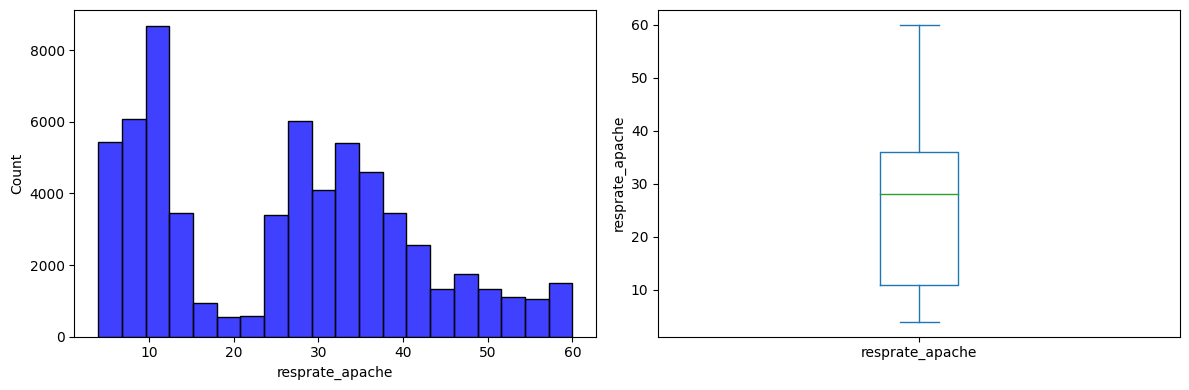

In [22]:
histograma("resprate_apache",dados)

* No gráfico bivariado abaixo de frequência respiratoria percebemos pela média que a frequência respiratoria media dos pacientes que vieram a obito é bem maior do que a esperada nos dois valores de referência.  
Vemos no gráfico boxplot que o quartil daqueles que morreram esta mais acima daqueles que permaneceram vivos, nos mostrando a alta frequência respiratoria daqueles que morreram.
Não há pontos aberrantes em nenhum dos dois boxplots.  
No gráfico de dispersão tambem observamo um buraco no gráfico, pacientes com valores entre 18 e 24 tem menor probabilidade de morrer enquanto o restante dos valores preenchem o gráfico quase que completamente.


pre_icu_los_days                                           \
                          count      mean       std        min       25%   
hospital_death                                                             
0                       58659.0  0.788503  2.410658 -11.409722  0.035417   
1                        5540.0  1.369714  3.468253 -13.775000  0.036806   

                                                
                     50%       75%         max  
hospital_death                                  
0               0.137500  0.395139  159.090972  
1               0.143056  0.827951   63.827083

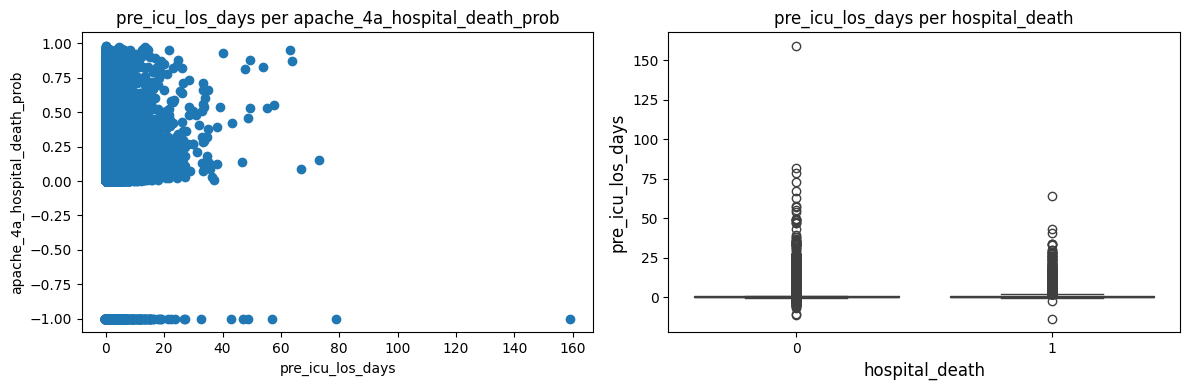

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("pre_icu_los_days","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("pre_icu_los_days","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

### Medidas de posição e dispersão

* Breve introdução:  

As medidas de posição permitem inferir sobre o valor que a variável aleatória assumirá, ja as medidas de dispersão permitem medir quão confiáveis são estas inferências.  
As medidas analisadas aqui serão a moda, a media, a mediana, a variancia e o desvio padrão.  
A moda a média e a mediana são medidadas de posição e indicam:  
* moda é o valor que é mais observado na amostra.  
* média é a razão entre a soma dos valores observados e o número de valores observados, representa  o centro de gravidade da amostra.  
* mediana é o valor que se localiza no centro de uma amostra ordenada.   
O desvio padrão e variância sao medidas de dispersão e indicam se os valores estão ou não proximos da média.

Já as variaveis analisadas serão as mesmas variaveis quantitativas analisadas, por terem relação com o diagnostico APACHE-III e fornecerem bons resultados sobre o estado do paciente.   
Como as variáveis de interesse nos fornece valores de referência por faixas etárias é importante analisar as medidas de posição e dispersão por idade.  


In [24]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56119.0,61.727917,16.866711,16.0,52.0,64.0,75.0,89.0
1,5087.0,68.585610,14.445924,16.0,60.0,71.0,80.0,89.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,61.727917,67.0,64.0,284.485951,16.866711,73.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,68.58561,78.0,71.0,208.684716,14.445924,73.0



Pelos dados obtidos podemos ver que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etária e também os valores de referência fornecidos pelo ministério da saúde.   
São eles:  
* Temperatura corporal: entre 35 º C e 36º C.  
* Frequência cardíaca (pulso): entre 60 e 90 bpm.  
* Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
* Respiração: entre 16 e 20 mrpm.  


#### heart_rate_apache

* Na análise abaixo das medidas de posição e dispersão da frequência cardíaca vemos uma média e mediana menor para os pacientes que permaneceram vivos e também um desvio padrão e variância menor em relação aqueles que vieram a óbito.  
Porém, os pacientes que não morreram estão com uma moda extramamente maior que aqueles que morreram.

In [25]:
dataframe = dados
varName = "heart_rate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,58109.0,98.615739,30.339018,30.0,84.0,103.0,118.0,178.0
1,5465.0,110.411528,34.149646,30.0,96.0,115.0,133.0,178.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,98.615739,100.0,103.0,920.455993,30.339018,148.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,110.411528,30.0,115.0,1166.198293,34.149646,148.0


#### map_apache

* Na análise abaixo das medidas de posição e dispersão da pressão arterial vemos que aqueles pacientes que permaneceram vivos tem medidas como média, moda e mediana maiores do que aqueles que vieram a óbito, porém com variância e desvio padrão menores.  
Observamos também que das variáveis analisadas são aqueles que possuem maior variância e desvio padrão indicando a grande distância e variabilidade dos dados em ambas as categorias.

In [26]:
dataframe = dados
varName = "map_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,58036.0,88.649648,41.466745,40.0,55.0,67.0,124.0,200.0
1,5450.0,82.393578,47.850038,40.0,45.0,57.0,128.0,200.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,88.649648,56.0,67.0,1719.49095,41.466745,160.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,82.393578,40.0,57.0,2289.626129,47.850038,160.0


#### resprate_apache

* Na análise abaixo das medidas de posição e dispersão da frequência respiratória vemos que os dados daqueles que permaneceram vivos tem medidas de média e e mediana menores daqueles que vieram a óbito mas que medidas como moda, variância e desvio padrão são bem maiores o que pode indicar uma grande variabilidade dos dados daqueles que permaneceram vivos.  
Também percebemos que as medidas tanto de variância quanto desvio padrão sao altos em ambas as categorias.

In [27]:
dataframe = dados
varName = "resprate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,57856.0,25.421301,15.092625,4.0,11.0,27.0,36.0,60.0
1,5453.0,30.089474,14.698879,4.0,18.0,32.0,39.0,60.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,25.421301,10.0,27.0,227.787334,15.092625,56.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,30.089474,30.0,32.0,216.057035,14.698879,56.0


#### temp_apache

* Na análise abaixo das medidas de posição e dispersão da temeperatura observamos que os pacientes com uma temperatura em torno da considerada normal são aqueles pacientes que permaneceram vivos com moda, mediana e média em torno de 36.5 e com variância e desvio padrão considerados baixos no nosso conjunto de dados, o que indica uma baixa variabilidade.  
Ademais, também percebemos que possuem variância e um desvio padrão menor em relação aos pacientes que vieram a óbito.  
Os pacientes que vieram a óbito tem uma média de temperatura menor que ja pode ser considerada fora do normal mas que possui mediana e moda não tão diferente daqueles que permaneceram vivos.

In [28]:
dataframe = dados
varName = "temp_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56199.0,36.453325,0.74005,32.1,36.2,36.5,36.7,39.7
1,5130.0,35.990957,1.44767,32.1,35.6,36.3,36.7,39.7


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,36.453325,36.4,36.5,0.547674,0.74005,7.6


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,35.990957,36.4,36.3,2.09575,1.44767,7.6


##  2.3. Transformação de variáveis

* Abaixo separamos as variáveis de acordo com a nossa análise descritiva considerando aquelas que foram submetidas a análise.  
Essas variáveis servirão no nosso modelo de previsão e buscaremos a partir delas prever a variável "hospital_death".   
 Consideramos todas as variáveis anteriormente analisadas mesmo que tenham pouca ou muita relação com nossa variável de interesse pois ao considerarmos mais variáveis temos uma melhora considerável em cada modelo. Quanto mais dados e mais variáveis, melhor.

In [29]:
quali_var = ['gender',
'icu_admit_source',
'leukemia',
'diabetes_mellitus',
'solid_tumor_with_metastasis',
'cirrhosis',
'hepatic_failure',
'immunosuppression',
'ventilated_apache',
'intubated_apache']
quant_var = ['heart_rate_apache',
'temp_apache',
'resprate_apache',
'map_apache',
'apache_4a_hospital_death_prob']
quanti_Df = dados[quant_var]
quali_Df =dados[quali_var]
treino_dados_y = dados['hospital_death']

* Como possuímos dados faltosos no nosso conjunto, faz-se necessário imputar esses valores faltantes.  
Dessa maneira, faremos o processo de imputação para as variáveis quantitativas. Como critério de imputação, utilizaremos a mediana dos valores de cada variável a ser imputada.

In [30]:
from sklearn.impute import SimpleImputer
print("-----------------dados quantitativos antes da imputação----------------")
print("\n")
display(quanti_Df)
print("\n")
print("------------------Descrição dos dados antes da imputação--------------------")
display(quanti_Df.describe())
imputer = SimpleImputer(strategy = "median", add_indicator = True)
imputer.fit(quanti_Df)
print('medianas: ', imputer.statistics_)


-----------------dados quantitativos antes da imputação----------------




,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob
0,116.0,36.7,32.0,56.0,0.05
1,129.0,36.7,31.0,54.0,0.11
2,43.0,36.4,27.0,46.0,-1.00
3,139.0,36.9,28.0,178.0,0.09
4,113.0,NaN,41.0,56.0,0.10
...,...,...,...,...,...
64194,104.0,36.8,29.0,73.0,0.01
64195,90.0,36.7,34.0,73.0,0.03
64196,113.0,36.6,6.0,50.0,0.05
64197,83.0,36.0,12.0,63.0,0.09




------------------Descrição dos dados antes da imputação--------------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob
count,63574.000000,61329.000000,63309.000000,63486.000000,58602.000000
mean,99.629739,36.414649,25.823385,88.112592,0.085932
std,30.862527,0.832779,15.115849,42.088844,0.248674
min,30.000000,32.100000,4.000000,40.000000,-1.000000
25%,86.000000,36.200000,11.000000,54.000000,0.020000
50%,104.000000,36.500000,28.000000,67.000000,0.050000
75%,120.000000,36.700000,36.000000,125.000000,0.130000
max,178.000000,39.700000,60.000000,200.000000,0.980000


medianas:  [1.04e+02 3.65e+01 2.80e+01 6.70e+01 5.00e-02]


- Logo abaixo podemos ver os dados após a imputação

In [31]:
#trocar pra quanti transformados
quanti_Df = pd.DataFrame(imputer.transform(quanti_Df), columns= imputer.get_feature_names_out())
('Nome das colunas: ', imputer.get_feature_names_out())
print("-------------------Apos a imputação pela mediana--------------------")
print("\n")
display(quanti_Df.head())
print("\n")
print("------------------Descrição dos dados apos a imputação--------------------")
display(quanti_Df.describe())


-------------------Apos a imputação pela mediana--------------------




,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,116.0,36.7,32.0,56.0,0.05,0.0,0.0,0.0,0.0,0.0
1,129.0,36.7,31.0,54.0,0.11,0.0,0.0,0.0,0.0,0.0
2,43.0,36.4,27.0,46.0,-1.00,0.0,0.0,0.0,0.0,0.0
3,139.0,36.9,28.0,178.0,0.09,0.0,0.0,0.0,0.0,0.0
4,113.0,36.5,41.0,56.0,0.10,0.0,1.0,0.0,0.0,0.0




------------------Descrição dos dados apos a imputação--------------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
count,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000
mean,99.672285,36.418465,25.853560,87.878113,0.082799,0.009735,0.044705,0.013863,0.011106,0.087182
std,30.714926,0.814142,15.012862,41.912909,0.237803,0.098187,0.206656,0.116924,0.104799,0.282104
min,30.000000,32.100000,4.000000,40.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.000000,36.200000,11.000000,54.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.000000,36.500000,28.000000,67.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,36.700000,36.000000,124.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000
max,178.000000,39.700000,60.000000,200.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000


* Além da imputação, também realizamos a padronização de nossas variáveis quantitativas, ou seja, colocamos os valores das variáveis em uma mesma escala, para que tenham média 0 e desvio padrão de 1.  
Este processo é crucial, pois para muitos modelos de machine learning os dados precisam estar padronizados. 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(quanti_Df)
quanti_Df = pd.DataFrame(scaler.transform(quanti_Df), columns= scaler.get_feature_names_out())
print("---------------Dados apos a padronização-----------------")
display(quanti_Df.head())
print("---------------Descrição dos dados apos a padronização-----------------")
display(quanti_Df.describe())

---------------Dados apos a padronização-----------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045


---------------Descrição dos dados apos a padronização-----------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
count,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04
mean,-2.127234e-16,-6.867912e-15,-5.423230e-18,1.593766e-17,-9.496186e-17,1.914732e-17,9.651136e-17,2.257835e-17,-2.335309e-17,-1.261731e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.268370e+00,-5.304353e+00,-1.455667e+00,-1.142333e+00,-4.553382e+00,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
25%,-4.125806e-01,-2.683396e-01,-9.893966e-01,-8.083041e-01,-2.640838e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
50%,1.409005e-01,1.001492e-01,1.429745e-01,-4.981347e-01,-1.379279e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
75%,6.618240e-01,3.458084e-01,6.758551e-01,8.618387e-01,1.564357e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
max,2.550171e+00,4.030696e+00,2.274497e+00,2.675137e+00,3.772903e+00,1.008555e+01,4.622660e+00,8.434080e+00,9.436137e+00,3.235777e+00


* O processo feito a seguir é denominado One-Hot-Encoding. Destina-se a transformar as características das variáveis qualitativas em colunas (novas variáveis), onde o número 1 representa o valor afirmativo dessa variável e o valor 0 representa valor negativo.  
O One-Hot-Enconding é um passo necessários para aplicarmos modelos de machine learning.

In [33]:
from sklearn.preprocessing import OneHotEncoder
codificador_qualitativas = OneHotEncoder() 
OHE_quali= codificador_qualitativas.fit_transform(quali_Df)
# (quali_encoder_1hot)

- Dados qualitativos antes do O.H.E

In [34]:
quali_ohe_df = pd.DataFrame(OHE_quali.toarray(), columns=codificador_qualitativas.get_feature_names_out())
print("-----------------Dados qualitativos antes do OHE-----------------")
quali_Df.head(5)


-----------------Dados qualitativos antes do OHE-----------------


,gender,icu_admit_source,leukemia,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,hepatic_failure,immunosuppression,ventilated_apache,intubated_apache
0,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,M,Accident & Emergency,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,M,Floor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


* Dados qualitativos após o one-hot-encoding:

In [35]:
print("-----------------Dados qualitativos após do OHE-----------------")
quali_ohe_df.head(5)

-----------------Dados qualitativos após do OHE-----------------


,gender_F,gender_M,gender_nan,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_admit_source_nan,leukemia_0.0,...,hepatic_failure_nan,immunosuppression_0.0,immunosuppression_1.0,immunosuppression_nan,ventilated_apache_0.0,ventilated_apache_1.0,ventilated_apache_nan,intubated_apache_0.0,intubated_apache_1.0,intubated_apache_nan
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


* DataFrame após todos os processos (imputação, padronização e one-hot-enconding):

In [36]:
trainOk = pd.concat([quanti_Df, quali_ohe_df], axis=1)
trainOk.head()

,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob,...,hepatic_failure_nan,immunosuppression_0.0,immunosuppression_1.0,immunosuppression_nan,ventilated_apache_0.0,ventilated_apache_1.0,ventilated_apache_nan,intubated_apache_0.0,intubated_apache_1.0,intubated_apache_nan
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 2.4. Partição dos dados em treinamento e teste 

* Nesta etapa faremos uma partição nos dados para aplicarmos aos nossos modelos construídos.  
Essa partição é muito importanteno nosso conjunto de dados, para ajustarmos nossos modelos, construir melhores parametros e tambem para evitar o overfiting.   
Usaremos tambem o sistema de  pipeline, que é uma sequência de etapas que resumem todo o processo de padronização dos dados que fizemos anteriormente.

In [37]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler#, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 
 
quantiPipeline = Pipeline([('imputer', SimpleImputer(strategy = "median", add_indicator = True)), 
                           ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))
qualiPipeline = Pipeline([('ohe', OneHotEncoder(sparse_output = False)), 
                           ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))

- Aqui podemos observar como é o dataframe após toda esse processo nos dados

In [38]:
quantiOk = pd.DataFrame(quantiPipeline.fit_transform(quanti_Df), 
                        columns=quantiPipeline.get_feature_names_out())
quantiOk.head()

,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045


In [39]:
from sklearn.compose import ColumnTransformer
fullPipeline = ColumnTransformer([("qt", quantiPipeline, quant_var), 
                                  ("ql", qualiPipeline, quali_var)]) 
fullPipeline

ColumnTransformer(transformers=[('qt',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['heart_rate_apache', 'temp_apache',
                                  'resprate_apache', 'map_apache',
                                  'apache_4a_hospital_death_prob']),
                                ('ql',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['gender', 'icu_admit_source', 'leukemia',
                                  'diabetes_mellitus',
                                  'solid_tumor_with_metastasis', 'cirrhosis',
                                  'hepatic_failure', 'immunosuppression',
                                  'ventilated_apache', 'intubated_apache'])])

* Usaremos dois tipos de partições:  
- Primeira partição: dividir nosso conjunto de dados igualmente, ou seja, dividiremos o dataframe para termos 50% de dados com pacientes que foram a óbito e 50% dos pacientes que permaceram vivos.  

In [40]:
df_0 = dados[dados['hospital_death'] == 0] 
df_1 = dados[dados['hospital_death']== 1] 

df_0_subsampled = df_0.sample(n=len(df_1), random_state=42) 

df_balanced = pd.concat([df_0_subsampled, df_1])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_val_index, test_index in split.split(df_balanced,df_balanced["hospital_death"]):
    train_val_set = df_balanced.loc[train_val_index]
    test_set = df_balanced.loc[test_index]



dados_treino_balanced = train_val_set
dados_teste_balanced = test_set

y_train_balanced = dados_treino_balanced['hospital_death']
y_test_balanced = dados_teste_balanced['hospital_death']

x_teste_balanced = fullPipeline.fit_transform(dados_teste_balanced)
x_train_balanced = fullPipeline.fit_transform(dados_treino_balanced)

- Segunda partição: utilizaremos todo o nosso conjunto de dados:

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_val_index, test_index in split.split(dados,dados["hospital_death"]):
    train_val_set = dados.loc[train_val_index]
    test_set = dados.loc[test_index]


# Resultados
dados_treino = train_val_set
dados_teste = test_set

y_train = dados_treino['hospital_death']
y_teste = dados_teste['hospital_death']
#y_val_balanced = dados_validacao_balanced['hospital_death']


#x_val_balanced = fullPipeline.fit_transform(dados_validacao_balanced)
x_teste= fullPipeline.fit_transform(dados_teste)
x_train = fullPipeline.fit_transform(dados_treino)

# 3. Modelagem

## 3.1. Modelos manualmente definidos

- Nesta etapa aplicaremos dois tipos de modelo: os modelos balanceados e os modelos não balanceados.   
- Nos modelos balanceados, os dados foram previamente repartidos para terem 50% de dados referente a pacientes que sobreviveram e 50% de pacientes que foram a óbito;   
- Nos modelos não balanceados, os modelos foram construídos considerando todo o conjunto de dados, sem partição;    
O intuito desta metodologia é para uma análise prévia do desempenho dos modelos, uma vez que dados não balanceados prejudicam na performance dos modelos e na geração de boas previsões, sendo vítima do Paradoxo da Acurácia, em que os parâmetros dos modelos não irão levar em consideração a classe minoritária do nosso dataset.   


## 3.1.2 Modelos balanceados

### Logistic Regression

* Abaixo veremos o modelo de regressão logistica e suas configurações.

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1.5,solver='saga') 
log_reg.fit(x_train_balanced, y_train_balanced)
y_pred = [y_p for y_p in log_reg.predict(x_train_balanced)]
y_train_predictions = [round(y_hat) for y_hat in y_pred]
y_test_predictions = [round(y_hat) for y_hat in log_reg.predict(x_teste_balanced)]

- O modelo rotula muitos pacientes vivos e isso faz com que o modelo erre.  
Ele não consgue classificar corretamente os valores que deveriam ser de morte e por isso perde desempenho tanto no conjunto de treino quanto no de teste.    
Veja que modelo nos valores de teste seguiu o desempenho da mesma forma que no treinamento.

 --------------------------- Acuracy for balanced models  --------------------------- 
                model  train_accuracy  teste_acuracy
0  LogisticRegression        0.747744       0.761282


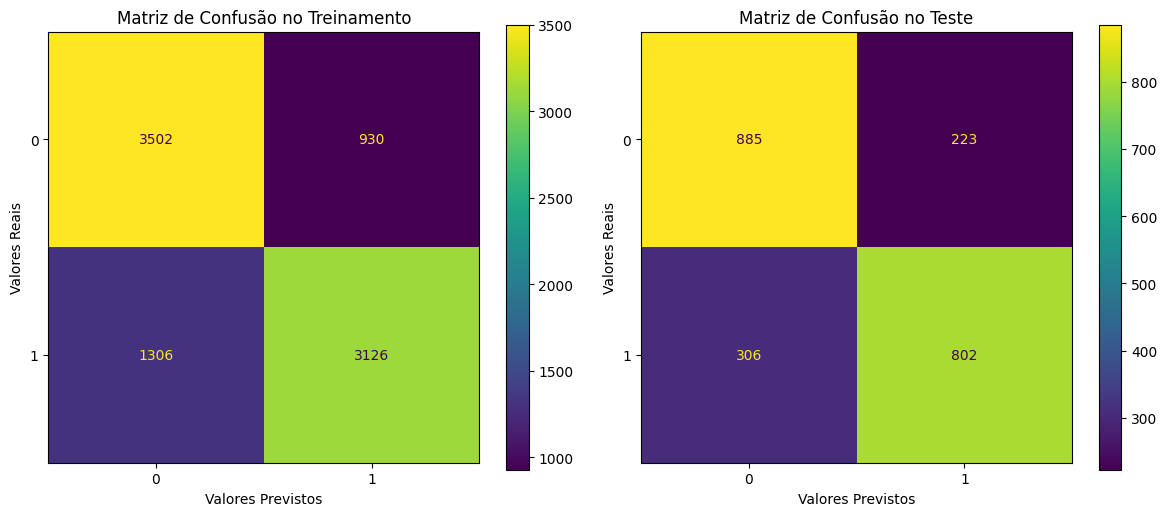

In [43]:
computeAccuracyModels([log_reg])
Plot_confusion_matrix(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### Decision Tree Classifier

* A seguir veremos o modelo de árvore de decisão.  

In [44]:


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5) 
tree_reg.fit(x_train_balanced, y_train_balanced)
y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_train_balanced)]
y_test_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_teste_balanced)]

* Logo abaixo podemos ver o desempenho do modelo nos dados de teste e de treino, Veja que o modelo possui um desempenho muito bom nos dados de treinamento categorizando os valores tanto de pacientes vivos quanto aqueles que foram a obitos corretamente. 
Nos dados de teste o modelo perde um pouco de desempenho, porém ainda consegue categorizar bem os valores.  
Mesmo assim o modelo ainda dificuldade por acabar prevendo casos de paciente que sobreviveram quando deveriam ser previstos como pacientes que morreram. 

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_acuracy
1  DecisionTreeClassifier        0.961643       0.723375
0      LogisticRegression        0.747744       0.761282


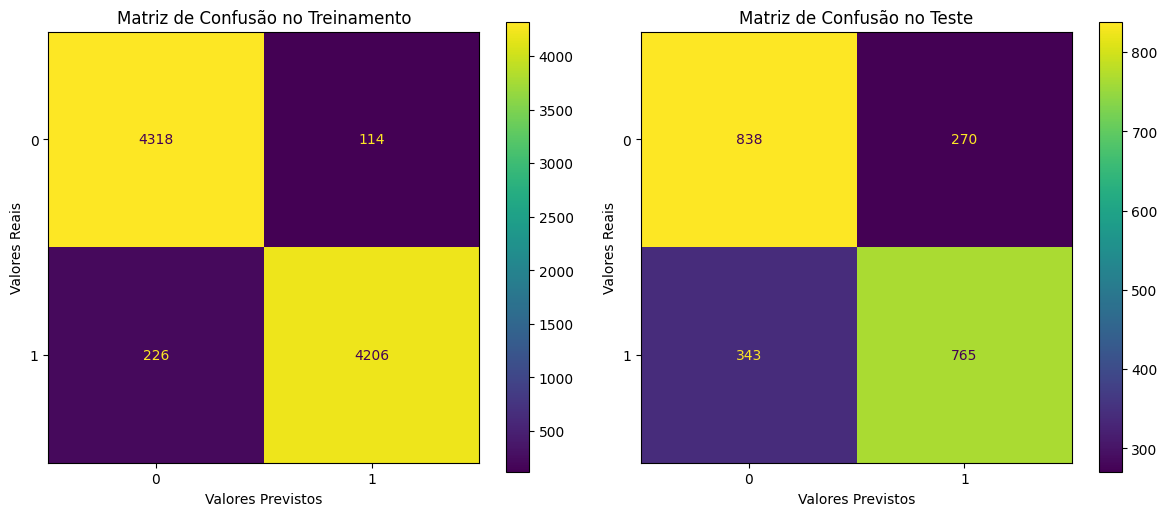

In [45]:
computeAccuracyModels([tree_reg])
Plot_confusion_matrix(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)


### Random forest Classifier

* A seguir veremos o modelo de floresta de classificação.   

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(random_state=0, min_samples_split = 20, 
                     n_estimators=150,criterion= 'entropy',max_features= 'log2') 
forest_reg.fit(x_train_balanced, y_train_balanced)
y_train_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_train_balanced)]
y_test_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_teste_balanced)]

* O modelo de floresta de classificação foi o modelo com melhor desempenho prevendo corretamente os casos de pacientes vivos e mortos tanto nos dados de treinamento quanto nos dados de teste.  
O modelo não parece ter mais dificuldade em prever um caso que outro tendo os numeros do erros nas matrizes de confusão bem semelhantes.  
Este modelo pode ser considerado extremamente bom por ter um desempenho bom nos dois conjuntos o que indica que o modelo realmente conseguiu aprender nos dados de treinamento.

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_acuracy
1  DecisionTreeClassifier        0.961643       0.723375
2  RandomForestClassifier        0.855257       0.789260
0      LogisticRegression        0.747744       0.761282


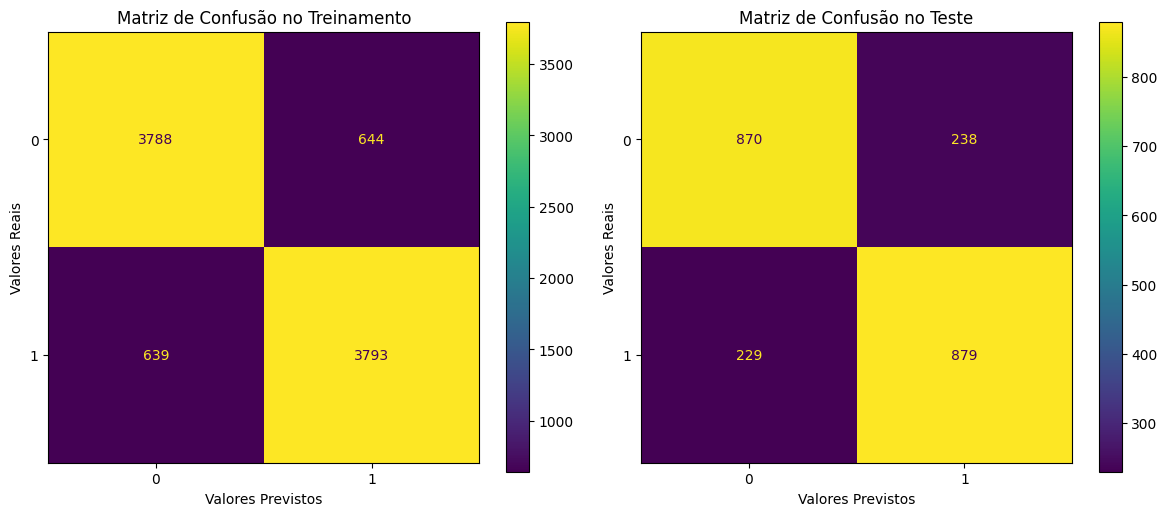

In [47]:
computeAccuracyModels([forest_reg])
Plot_confusion_matrix(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### XGBoost Regression

* Já o modelo de xgboost se mostra muito bom, porém isso so ocorre nos dados de treinamento do modelo, nos dados de teste o modelo tem um desempenho muito pior em comparação com os dados de treinamento conforme visto nas matrizes de confusão abaixo.  

In [48]:
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='binary:logistic', n_estimators = 100,
                            seed = 0, max_depth = x_train_balanced.shape[1])
xgb_reg.fit(x_train_balanced, y_train_balanced)
y_pred = [y_p for y_p in xgb_reg.predict(x_train_balanced)]
y_train_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_train_balanced)]
y_test_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_teste_balanced)]

* Na matriz de confusão dos dados de treinamento pode-se observar que o modelo praticamente não erra, isso indica  que o modelo esta decorando os dados de treinamento e por isso consegue categorizar tão bem os dados.  
Já nos dados de teste vemos os erros que acontecem no modelo e que acontece ao contrário do observado até agora nos dados de treinamento.  
O modelo nos dados de teste categoriza mais pacientes como obito quando deveria categorizar como pacientes vivos, além disso vemos que o modelo  xgboost nos dados de teste categoriza menos pacientes como vivos o que é um comportamento diferrentes dos modelos definidos anteriormente que conseguia categorizar melhor os pacientes que permaneciam vivos.  

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_acuracy
3            XGBRegressor        0.995713       0.748646
1  DecisionTreeClassifier        0.961643       0.723375
2  RandomForestClassifier        0.855257       0.789260
0      LogisticRegression        0.747744       0.761282


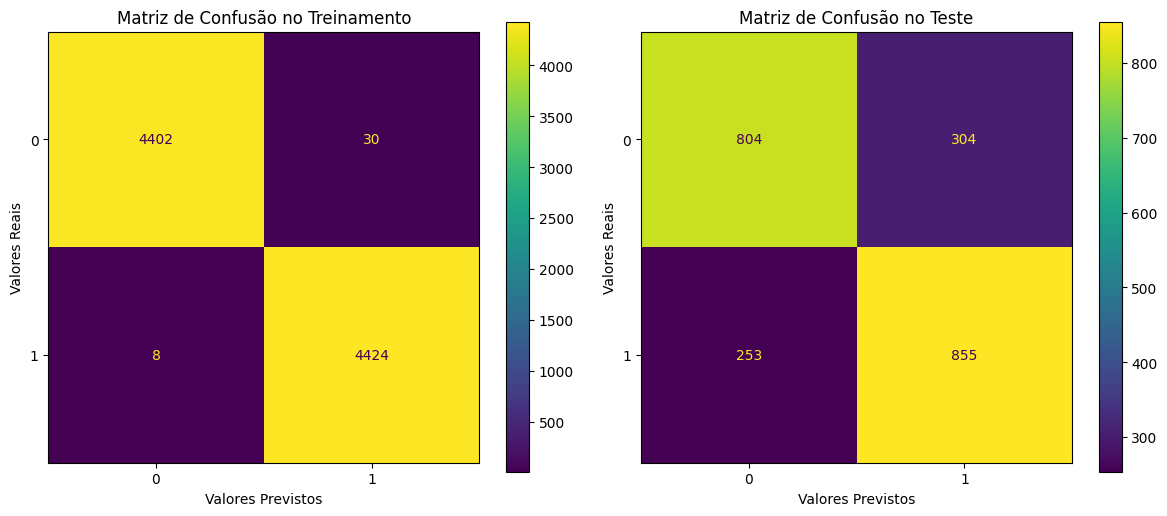

In [49]:
computeAccuracyModels([xgb_reg])
Plot_confusion_matrix(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### Artificial Neural Network (ANN)

* A seguir veremos o modelo de redes Neurais Artificiais (ANN), este modelo possui um ótimo desempenho assemelhando-se muito ao melhor modelo visto ate agora.  

In [50]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier(random_state=0, hidden_layer_sizes=(200), learning_rate_init=0.05, learning_rate='constant',
                        activation='relu', max_iter=1000)
ann_clf.fit(x_train_balanced, y_train_balanced)
y_train_predictions = ann_clf.predict(x_train_balanced)
y_test_predictions = ann_clf.predict(x_teste_balanced)

* É possivel ver na matriz de confusão abaixo que o bom desempenho ocorreu tanto nos dados de treinamento quanto nos dados de teste,isto é, o modelo de ANN não se ajustou excessivamente aos dados de treinamento e conseguir replicar a aprendizagem nos dados de teste.   
O modelo possui um pequeno excesso nos valores que ele preve óbito para o paciente quando na verdade deveria categorizar como vivo, isto é mais notório nos dados de teste.   
Outro ponto a se destacar é que mesmo com o ótimo desempenho deste modelo, o modelo de random forest classifier tem um desempenho ainda melhor tanto nos dados de treinamento quanto nos dados de teste.  

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_acuracy
3            XGBRegressor        0.995713       0.748646
1  DecisionTreeClassifier        0.961643       0.723375
2  RandomForestClassifier        0.855257       0.789260
4           MLPClassifier        0.796367       0.779783
0      LogisticRegression        0.747744       0.761282


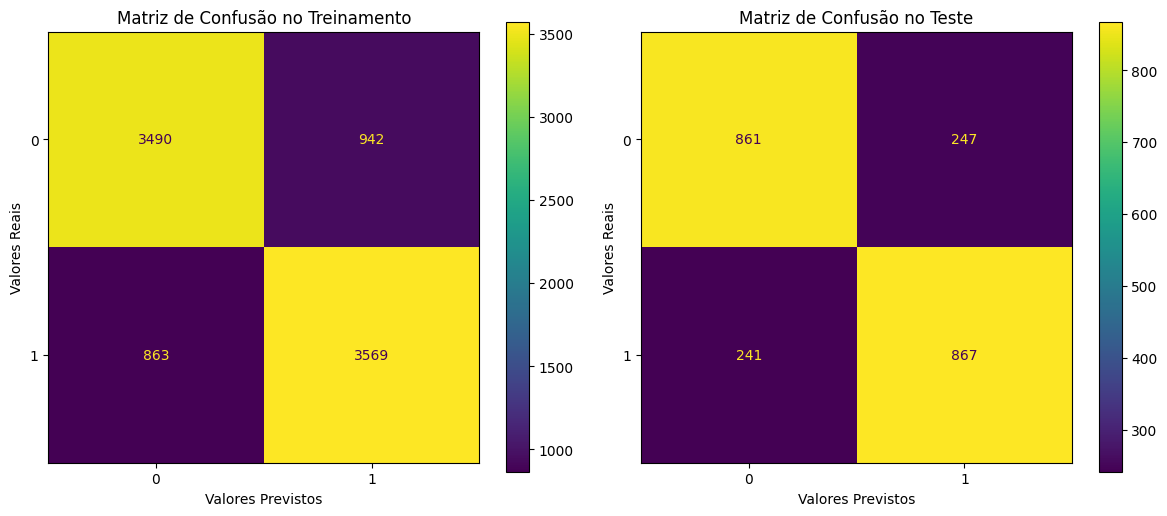

In [51]:
computeAccuracyModels([ann_clf])
Plot_confusion_matrix(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### Melhor modelo

* Conforme visto anteriormente o melhor modelo foi mo modelo de floresta de classificação pois conseguiu um bom desempenho nos dados de treinamento e conseguiu replicar aquele desempenho nos dados de teste sendo o melhor modelo para esse dados.   
Portanto, consideraremos este modelo para o artigo da disciplina.    

In [52]:
computeAccuracyModels([ann_clf])

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_acuracy
3            XGBRegressor        0.995713       0.748646
1  DecisionTreeClassifier        0.961643       0.723375
2  RandomForestClassifier        0.855257       0.789260
4           MLPClassifier        0.796367       0.779783
5           MLPClassifier        0.796367       0.779783
0      LogisticRegression        0.747744       0.761282


## 3.1.3 Modelos normais

* Nos modelos normais faremos os modelos de previsão usando os dados do cojunto orignal, ou seja, com uma grande quantidade de paciente que permanceram vivos e poucos que vieram a óbito.      
Um ponto importante a se destacar é que os modelos abaixo definidos como normais possuem uma acurácia elevada acima de 0.90, porém essa acurácia se deve ao fato de que o modelo consegue prever o numero massivo de pacientes vivos, porém é possivel ver nas matrizes de confusão que os modelos normais tiveram um pessimo desempenho tanto nos dados de treinamento quanto nos dados de teste, ao tentar prever pacientes que vieram a obito.

### Logistic Regression

* Logo abaixo segue o modelo de regressão logistica, o modelo não se saiu tão bem mesmo sendo um bom modelo para classificação binairia.  

In [53]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1.5,solver='saga',class_weight={0: 1, 1: 3}) 
log_reg.fit(x_train, y_train)#.values.ravel())
y_train_predictions = [y_p for y_p in log_reg.predict(x_train)]
y_test_predictions =  [round(y_hat) for y_hat in log_reg.predict(x_teste)]

* O modelo de regressão logisitca não entregou bons resultados confomre dito anteriormente.   
Como os dados não estão balanceados o modelo so consegue prever os dados que são maioria no conjunto, ou seja, aqueles pacientes que permanceram vivos e não consegue prever a minoria do conjunto.  
Nas matrizes de confusão tanto para treino quanto para teste o modelo erra mais do que acerta os casos em que tenta classifcar o paciente como morto.

 --------------------------- Acuracy for balanced models  --------------------------- 
                model  train_accuracy  teste_accuracy
0  LogisticRegression        0.905294        0.903271


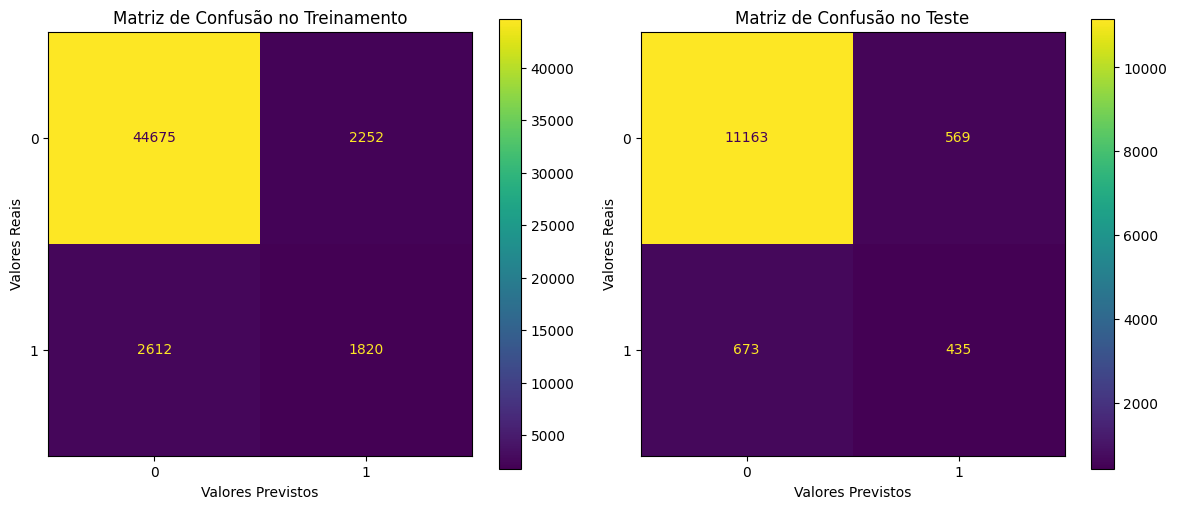

In [54]:
computeAccuracyModels_Normal([log_reg])
Plot_confusion_matrix_Normal(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### Decision Tree Classifier

* Já o modelo de arvore de decisão se saiu melhor.

In [55]:
#Concept

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5) 
tree_reg.fit(x_train, y_train)
y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_train)]
y_test_predictions =  [round(y_hat) for y_hat in tree_reg.predict(x_teste)]

* Nos dados de treinamento conseguimos prever mais valores corretamente tanto para pacientes que permaneceram vivos quanto para aqueles que morreram e erramos bem menos que no modelo de regressão logistica, conseguindo classifcar de forma melhor nossa variável.    
Porém nos dados de teste acabamos por ver o contrário, o modelo erra muitos valores na classificação e não conseguimos prever corretamente valores de pacientes que morreram nos dados de teste tendo um desempenho totalmente diferente dos dados de treinamento.

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_accuracy
1  DecisionTreeClassifier        0.984073        0.879673
0      LogisticRegression        0.905294        0.903271


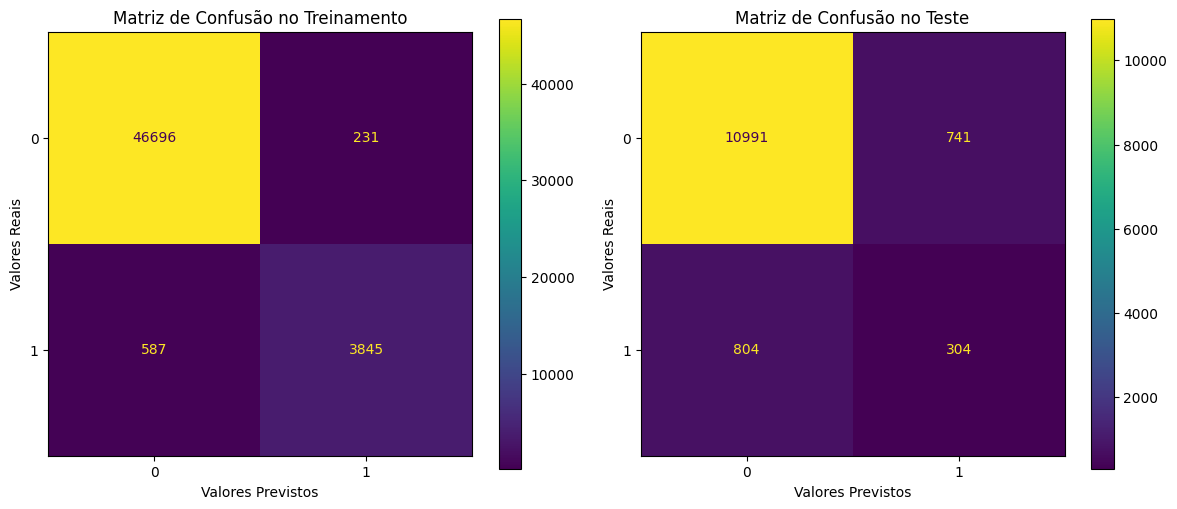

In [56]:
computeAccuracyModels_Normal([tree_reg])
Plot_confusion_matrix_Normal(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### Random Forest Classifier

* O modelo de  Randon Forest teve um desempenho semelhante ao modelo de Decision Tree.  
No modelo de  floresta de classificação tambem foi usado pesos nas variáveis para ter uma melhor categorização de pacientes mortos.    

In [57]:
class_weights = {0: 1, 1: 3}
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier(random_state=0, min_samples_split = 20, 
                     n_estimators=200,criterion= 'entropy',class_weight= class_weights,max_features= 'log2') 

forest_reg.fit(x_train, y_train)
y_train_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_train)]
y_test_predictions =  [round(y_hat) for y_hat in forest_reg.predict(x_teste)]


* No modelo de Floresta de classifição vemos que ele não teve um desempenho muito diferente do modelo de arvore de decisão, o modelo de floresta também conseguiu categorizar alguns valores corretamente tanto para obito quanto para aqueles que permaneceram vivos.  
Porém, o modelo de arvore de decisão tem um desempenho melhor que o modelo de floresta pois erra menos na classificação tanto de valores de obito quanto de pacientes que permaceram vivos.  
O que se vê no modelo de floresta de decisão é que este modelo preve muitos pacientes como vivos quando deveriam ser classificados como obito.  
Nos dados de teste o modelo perde ainda mais desempenho como visto na matriz de confusão.

b

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_accuracy
1  DecisionTreeClassifier        0.984073        0.879673
2  RandomForestClassifier        0.948227        0.915343
0      LogisticRegression        0.905294        0.903271


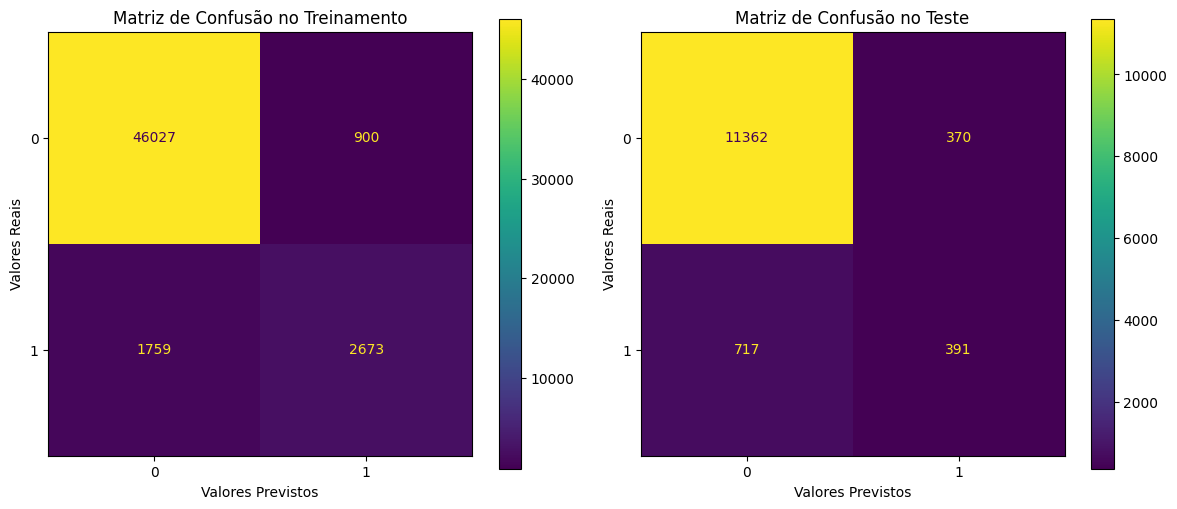

In [58]:
computeAccuracyModels_Normal([forest_reg])
Plot_confusion_matrix_Normal(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### XGBoost Regression

* A seguir veremos o modelo de XGBoost

In [59]:
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='binary:logistic', n_estimators = 100,
                            seed = 0, max_depth = x_train.shape[1])
xgb_reg.fit(x_train, y_train)
y_train_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_train)]
y_test_predictions =  [round(y_hat) for y_hat in xgb_reg.predict(x_teste)]

 * Já o modelo xgboost mostra grande desempnho nos dados de treinamento, errando menos de 60 casos e prevendo corretamente paciente que morreram e que sobreviveram, porém esse desempenho so é visto nos dados de treinamento.  
Nos dados de teste o modelo xgboost segue  o mesmo desempenho do modelos anteriores, não conseguindo classifcar corretamente os dados de pacientes mortos e classifcando muitos pacientes como vivos.

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_accuracy
3            XGBRegressor        0.998949        0.913785
1  DecisionTreeClassifier        0.984073        0.879673
2  RandomForestClassifier        0.948227        0.915343
0      LogisticRegression        0.905294        0.903271


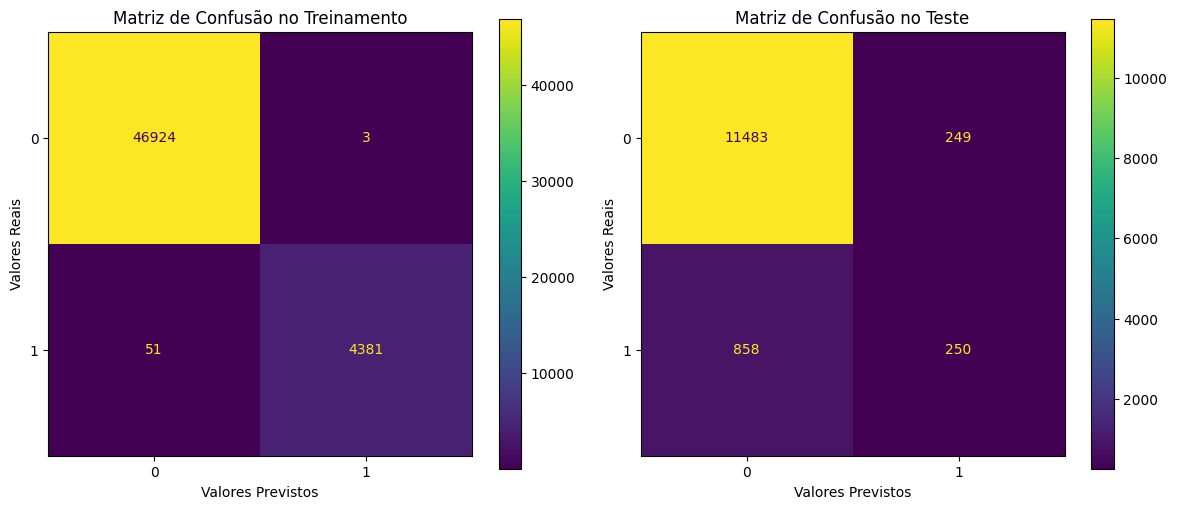

In [60]:
computeAccuracyModels_Normal([xgb_reg])
Plot_confusion_matrix_Normal(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### Artificial Neural Network (ANN)

* A seguir veremos o modelo de ANN.

In [61]:
from sklearn.neural_network import MLPClassifier

# Criando o modelo de MLP para classificação
ann_clf = MLPClassifier(random_state=0, hidden_layer_sizes=(200), learning_rate_init=0.05, learning_rate='constant',
                        activation='relu', max_iter=1000)

# Treinando o modelo com os dados balanceados
ann_clf.fit(x_train, y_train)

# Previsão para os dados de treino e teste
y_train_predictions = ann_clf.predict(x_train)
y_test_predictions = ann_clf.predict(x_teste)

* Com as matrizes de confusão abaixo é possivel perceber que o modelo manteve o mesmo comportamento dos modelo normais anteriormente definidos.   
O modelo so consegue categorizar bem aqueles pacientes que permaneceram vivos e isso se da pela grande quantidade de pacientes que permaceram vivos nos dados e o modelo não consegue categorizar aqueles pacientes que vieram a obito pois categoriza como vivo auentando os erros do modelo.   

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_accuracy
3            XGBRegressor        0.998949        0.913785
1  DecisionTreeClassifier        0.984073        0.879673
2  RandomForestClassifier        0.948227        0.915343
4           MLPClassifier        0.921026        0.919393
0      LogisticRegression        0.905294        0.903271


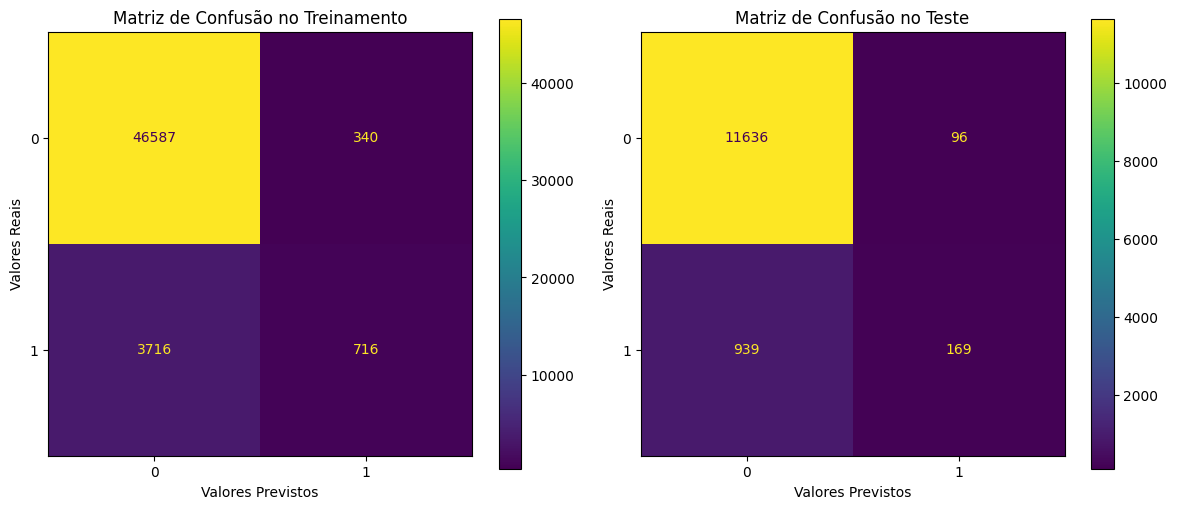

In [62]:
computeAccuracyModels_Normal([ann_clf])
Plot_confusion_matrix_Normal(y_test_predictions=y_test_predictions,y_train_predictions=y_train_predictions)

### Melhor Modelo

* O melhor modelo dos dados não balanceados foi o modelo XGBoost, porém vemos que a alta acurácia desse modelo é que ele consegue classificar bem os pacientes que permaneceram vivos mas que tem pessimo desempenho quando tenta classificar os pacientes que foram a óbito e como o objetivo da pesquisa é prever a mortalidade estes modelos não tem grande relevância.  


In [63]:
computeAccuracyModels_Normal([ann_clf])

 --------------------------- Acuracy for balanced models  --------------------------- 
                    model  train_accuracy  teste_accuracy
3            XGBRegressor        0.998949        0.913785
1  DecisionTreeClassifier        0.984073        0.879673
2  RandomForestClassifier        0.948227        0.915343
4           MLPClassifier        0.921026        0.919393
5           MLPClassifier        0.921026        0.919393
0      LogisticRegression        0.905294        0.903271


## 3.2. Modelos otimamente definidos

* A seguir faremos uma etapa de otimização de hiperparâmetros para tentar melhorar o desempenho dos nossos modelos de aprendizagem de máquina.  
A otimização de hiperparâmetros é um passo crucial no desenvolvimento de modelos de machine learning.    
A escolha adequada dos valores dos hiperparâmetros pode levar a um modelo com melhor desempenho e generalização, enquanto valores inadequados podem resultar em modelos que não atendem às expectativas. (citação:https://awari.com.br/hiperparametros-em-machine-learning-otimizacao-e-ajuste/?utm_source=blog&utm_campaign=projeto+blog&utm_medium=Hiperpar%C3%A2metros%20em%20Machine%20Learning:%20Otimiza%C3%A7%C3%A3o%20e%20Ajuste#:~:text=A%20otimiza%C3%A7%C3%A3o%20de%20hiperpar%C3%A2metros%20%C3%A9,que%20n%C3%A3o%20atendem%20%C3%A0s%20expectativas.)

* A partir desta otimização saberemos quais parâmetros se ajustam aos modelos utilizados e aos dados, com isto poderemos diminuir os erros dos modelos preditivos e melhorar a acurácia de cada um deles.  
Logo abaixo descrevemos as taticas usadas para esta otimização de hiperparâmetros.  

* __Randomized Search Cross Validation__:  
O Randomized Search também otimiza hiperparâmetros, mas de forma mais eficiente.  
Em vez de testar todas as combinações possíveis, ele amostra um número fixo de configurações de hiperparâmetros a partir de distribuições especificadas.  
Isso economiza tempo de computação e ainda permite encontrar boas combinações de hiperparâmetros.  
É especialmente útil quando o espaço de busca é grande e testar todas as combinações seria impraticável.  


* __BayesSearch Cross Validation__:  
O BayesSearch é uma abordagem baseada em otimização bayesiana.  
Ele usa inferência estatística para adaptar a busca de hiperparâmetros com base nos resultados anteriores.  
Em vez de amostrar aleatoriamente, ele escolhe pontos de busca com base em uma função de aquisição que leva em consideração o desempenho passado.  
Essa abordagem é mais eficiente e pode encontrar boas soluções com menos avaliações do modelo.  
É especialmente útil quando o espaço de hiperparâmetros é complexo e não linear.  
Em resumo, esses métodos ajudam a encontrar os melhores hiperparâmetros para otimizar o desempenho do seu modelo de machine learning.  

* A função abaixo servirá para comparar qual técnica de otimização foi melhor no modelo, tambem servirá para comparação entre os modelos para ver qual foi o modelo otimizado com melhor desempenho.   

In [64]:
import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models_label_metrics = []
models_accuracy_metrics = []
models_accuracy_teste_metrics = []
models_mean_rmse = []
models_std_rmse = []
def computeAccuracyAndRmseScores(models): 
    for model in models:
        mse_scores = - cross_val_score(model, x_train_balanced, y_train_balanced.values.ravel(), 
                                        scoring ="neg_mean_squared_error", cv = 3, 
                                        verbose = 0, n_jobs=3)#cv) 
        rmse_scores = np.sqrt(mse_scores)
        formalism = type(model).__name__
        models_label_metrics.append(formalism)
        y_pred = []
        y_pred_teste = []
        try:
            y_pred_teste = [round(y_hat) for y_hat in model.predict(x_teste_balanced)]
        except:
            y_pred_teste = [round(y_hat[0]) for y_hat in model.predict(x_teste_balanced)]
        try:
            y_pred = [round(y_hat) for y_hat in model.predict(x_train_balanced)]
        except:
            y_pred = [round(y_hat[0]) for y_hat in model.predict(x_train_balanced)]
        models_accuracy_metrics.append(accuracy_score(y_true = y_train_balanced.values, y_pred= y_pred))
        models_accuracy_teste_metrics.append(accuracy_score(y_true = y_test_balanced.values, y_pred= y_pred_teste))
        models_mean_rmse.append(rmse_scores.mean())
        models_std_rmse.append(rmse_scores.std())
        print(formalism, " ok ")
    df = pd.DataFrame({'model': models_label_metrics, 
                       'train_accuracy': models_accuracy_metrics, 
                       'teste_accuracy': models_accuracy_teste_metrics,
                       'cv_train_rmse_mean': models_mean_rmse})
    print(" --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- ") 
    print(df.sort_values(by="train_accuracy", ascending = False))
from skopt import BayesSearchCV
from skopt.plots import plot_objective
def getOptimalModelViaBayesSearchCv(modelObj, parsDists, x_train, y_train, verbose=False, 
                                    epochs=150, batch_size=32,validation_split=.2, callbacks=[]):
    opt = BayesSearchCV(modelObj, parsDists, n_iter=32,  cv=3, return_train_score = True, 
                        scoring = 'neg_mean_squared_error', verbose=verbose, n_jobs = 3)
    if(type(modelObj).__name__!='KerasRegressor'):
        opt.fit(X = x_train, y = y_train.values.ravel())
    else:
        opt.fit(X = x_train, y = y_train,  
                epochs=epochs, batch_size=batch_size,
                validation_split=validation_split, callbacks = callbacks)
    parNames = [name for name, value in parsDists.items()]
    _ = plot_objective(opt.optimizer_results_[0],
                    dimensions=parNames,
                    n_minimum_search=int(1e8))
    plt.show()
    print('best_params = ', opt.best_params_)
    print('best_score (RMSE)= ', np.sqrt(-opt.best_score_))
    model = opt.best_estimator_
    return (model)


'''Tentar fazer esta mesma  função para comparar os modelos normais e modelos balanceados'''

'Tentar fazer esta mesma  função para comparar os modelos normais e modelos balanceados'

* A partir daqui consideraremos somente os dados balanceados.  
Consideraremos estes dados pois conforme visto anteriormente o seu desempenho é muito melhor em relação ao conjunto de dados original.   
Por isso, ao tentar otimizar esses modelos teremos uma melhor classificação e um melhor desempenho.

### Logistic Regression via RandomizedSearchCV

Abaixo vemos a otimização do modelo de regressão logistica, ele nos entrega uma penalização L1 que tambem usamos no nosso modelo, porém vemos que ele entrega um valor de C muito maior do que o utilizado no nosso modelo melhorando assim o ddesempenho do modelo em relação ao que foi manualmente definido.

* Abaixo vemos a otimização do modelo de regressão logistica via RandomizedSearchCV, foi usado diferentes hiperparâmetros para buscar um melhor desempenho.  
Usamos parametros que são  "Literal" para que obtenhamos quais deles são os melhorese então o RandomizedSearchCV nos entregou os seguintes parametros:

    Parametro  | Valor do Parametro
    --------- | ------   
     C | 2.707795426588214
     fit_intercept | True
     l1_ratio | 0.7
     max_iter | 100  
     multi_class |  auto 
     n_jobs | 3
     solver |  liblinear 
     warm_start | False 

* Mesmo ao usar estes parametros o modelo otimizado não possui uma acurácia maior que o modelo sem otimização definido anteriormente.   
O modelo otimizado possui uma acurácia de 0.747744 nos dados de treinamento e, 0.761282 nos dados de teste.    
Em comparação com o modelo sem otimização é possivel observar que não houve alteração no desempenho do modelo, o modelo permanceu com a mesma acurácia tanto nos dados de teste quanto nos dados de treinamento.   

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform
distributions = dict(fit_intercept = [True,False],
                     max_iter=[90,70,80,100],
                     C=uniform(loc=0, scale=3),
                     multi_class=['auto', 'ovr', 'multinomial'],
                     solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                     warm_start=[True,False],
                     n_jobs= [1,3,5],
                     l1_ratio= [0.2,0.6,0.7])
log_reg2 = LogisticRegression(random_state=0, penalty='l1') 
search = RandomizedSearchCV(log_reg2, distributions, random_state=0, n_iter = 100, 
                            verbose=False, cv=3, scoring = 'neg_mean_squared_error')
search.fit(x_train_balanced, y_train_balanced.values.ravel())
print('best_params= ', search.best_params_)
print('best_score = ', -search.best_score_)
log_reg2 = search.best_estimator_#taking the best model
computeAccuracyAndRmseScores([log_reg2])
#acima de 747744

best_params=  {'C': 2.707795426588214, 'fit_intercept': True, 'l1_ratio': 0.7, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': 3, 'solver': 'liblinear', 'warm_start': False}
best_score =  0.25327008871888224
LogisticRegression  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                model  train_accuracy  teste_accuracy  cv_train_rmse_mean
0  LogisticRegression        0.747744        0.761282            0.503107


### Decision Tree Classifier via RandomizedSearchCV

* A seguir, foi feito uma otimização de hiperparâmetros via RandomizedSearchCV para o modelo de arvore de decisão.   
Foram testados diversos parametros e valores para tentar melhorar a qualidade do modelo, os melhores valores para os parametros do modelo foram:

    Parametro  | Valor do Parametro
    --------- | ------  
    criterion | log_loss
    max_depth | 4
    max_features |  log2 
    min_samples_leaf | 10 
    min_samples_split | 3
    min_weight_fraction_leaf | 0.01768121787774546 
    splitter |  best 


* A partir dos parâmetros é possivel perceber que os criterios de divisão da árvore são pequenos tendo que haver somente 3 amostras para criar um novo nó criando mais nós na arvore.   


* o max_depth de tamanho 4 significa que a árvore não tem uma complexidade muito alta na profundidade e tem poucos niveis de profundidade.  


* o min_sample_leaf de tamanho 10 significa que tem de haver pelo menos 10 amostras em cada folha, isto ajuda a evitar a criação de nós folhas muito complexa.   


* O min_sample_split de tamanho 3 significa  o número de amostras necessárias para que um nó possa ser divido, ou seja, são necessários 3 amostras para que o nó seja divido e criado um novo nó.   

* Estes parâmetros entregam uma acuracia de 0.750226 nos dados de treinamento e 0.767148 nos dados de teste.   
Nos dados de treinamento o modelo teve um pior desempenho comparado ao modelo de árvore de decisão sem otimiação, o modelo  sem otimização possui uma acurácia de 0.961643,ou seja, o modelo sem otimização possui 0.20 pontos de acurácia a mais que o modelo de árvore de decisão otimizado via RandomizedSearchCV.      
Já nos dados de teste foi possível obter um melhor ajuste de hiperparâmetros, pois o modelo sem otimização possui uma acurácia de 0.723375, estes hiperparâmetros nos entregaram um melhor desempenho aumentando a acurácia em cerca de 0.04 pontos nos dados de teste, conseguindo melhorar um pouco mais de desempenho no modelo de árvore de decisão.      


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
distributions = dict(
    criterion=['gini', 'entropy', 'log_loss'],
    splitter=['best', 'random'],
    max_depth=[4,5,7,10,15,20],
    min_samples_split=[3,4,6,10],
    min_samples_leaf=[8,10,15,20],
    min_weight_fraction_leaf=uniform(loc=0, scale=0.5),  # valor mais adequado para min_weight_fraction_leaf
    max_features=['auto', 'sqrt', 'log2']
)
tree_reg2 = DecisionTreeClassifier(random_state=0)
search = RandomizedSearchCV(tree_reg2, distributions, random_state=0, n_iter=90, 
                            verbose=False, cv=3, scoring='neg_mean_squared_error')
search.fit(x_train_balanced, y_train_balanced)
print('best_params= ', search.best_params_)
print('best_score = ', -search.best_score_)
tree_reg2 = search.best_estimator_
computeAccuracyAndRmseScores([tree_reg2])


best_params=  {'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.01768121787774546, 'splitter': 'best'}
best_score =  0.2567683995354984
DecisionTreeClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0      LogisticRegression        0.747744        0.761282            0.503107


### Decision Tree Classifier via BayesSearchCV

* O modelo de árvore de decisão via BayesSearchCV nos entrega diferentes valores para os parametros vistos anteriormente, estes parametros são:

    Parametro  | Valor do Parametro
    --------- | ------  
    ccp_alpha|  1.5634266804206962e-05
    max_depth | 43
    max_features | 43
    max_leaf_nodes | 20
    min_impurity_decrease | 0
    min_samples_leaf | 10
    min_samples_split | 21

* É possivel perceber que nesta otimização a árvore tem mais profundidade tendo uma profundidade de 43 niveis, ou seja, está arvore é mais complexa e por isso pode capturar aqueles padrões mais complexos e tem uma maior flexibilidade na divisão dos dados.   


* O max_leaf_nodes de tamanho 20 ajuda a limitar a árvore fazendo ela ter no máximo 20 nós folhas, com isso a árvore tem uma limitação a ser muito complexa e ajustar-se demais aos dados de treinamento.  


* O min_sample_leaf de tamanho 10 significa que o número de amostras deve ser 10 para criar um novo nó folha.  


* O min_sample_split de tamanho 21 significa o número de amostras necessárias para que um nó possa ser divido, ou seja, são necessários 21 amostras para que o nó seja divido e criado um novo nó, o que é um número razoavelmente grande de amostras.   

* É possível observar que os parâmetros são muito diferentes dos vistos na otimização via RandomizedSearchCV, os parametros de profundidade via BayesSearchCV são maiores enquanto o número  de amostras para divisão de nós é maior e o número de amostras para uma novo nó folha é menor.   
* A otimização via BayesSearch tem uma acurácia de 0.774143 nos dados de treinamento e 0.787906 nos dados de teste. 
Nos dados de treinamento a otimização do modelo ainda é pior que o modelo sem otimização, porém conseguiu aumentar a acurácia em comparação com o modelo via RandomizedSearchCV elevando a acurácia em aproximadamente 0.02 pontos.       
Esta otmização teve um desempenho melhor que a otimização via RandomizedSearchCV conseguindo elevar a acurácia de 0.774143 para 0.787906 nos dados de teste,  um valor de 0.1 ponto a mais que na otimização via RandomizedSearchCV e tendo um valor de 0.6 pontos a mais que o modelo de árvore de decisão sem otimização.   



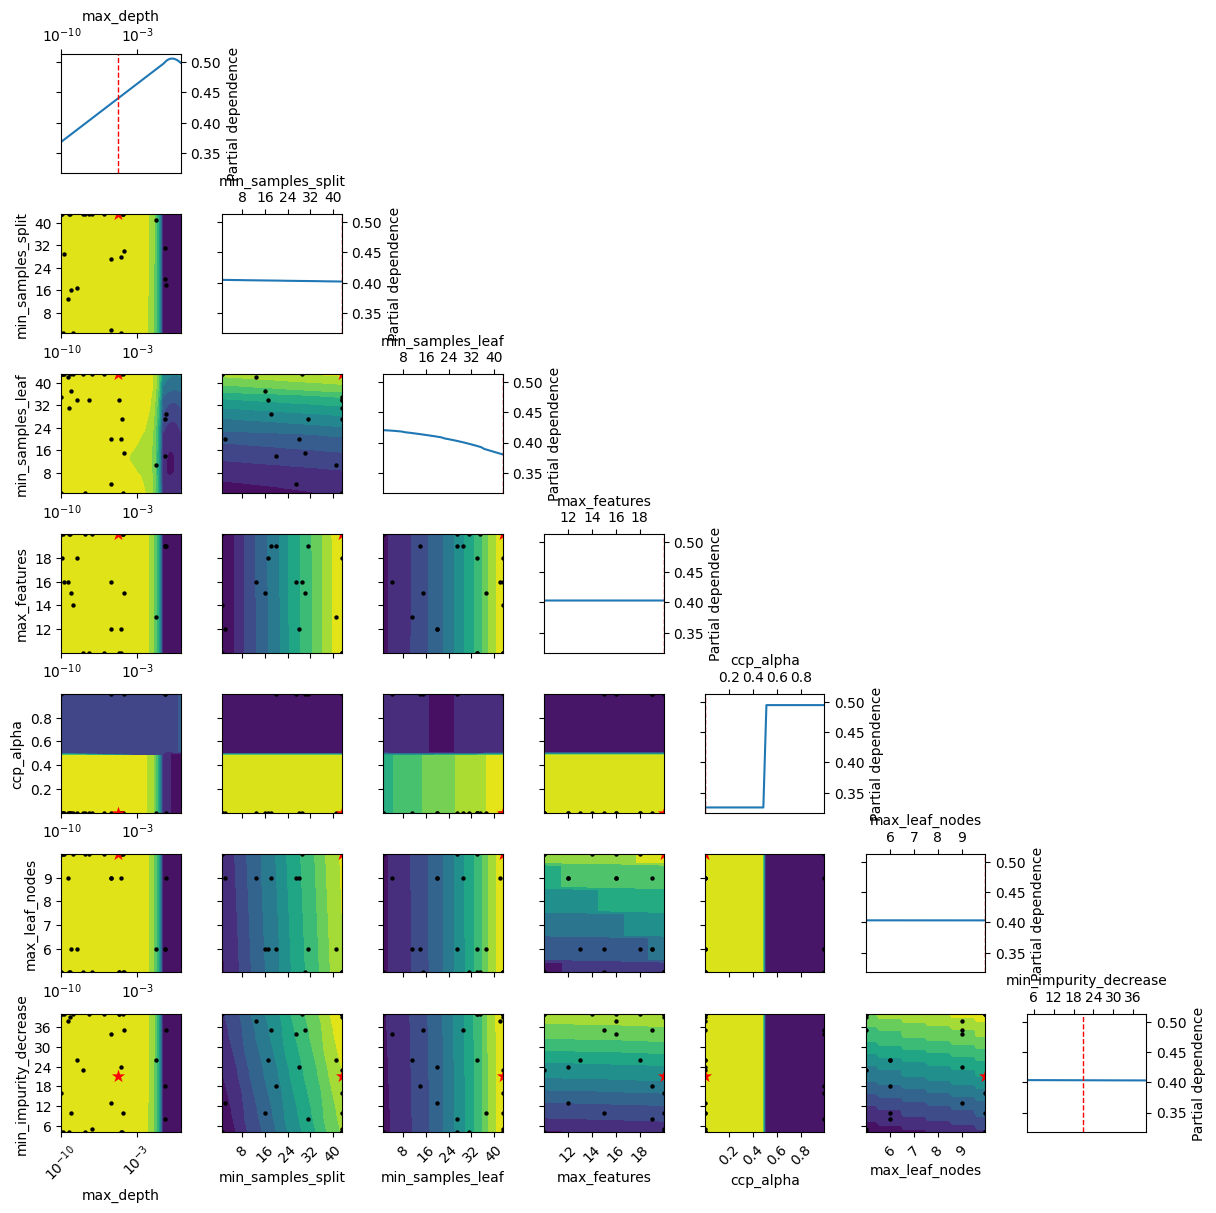

best_params =  OrderedDict([('ccp_alpha', 1.5634266804206962e-05), ('max_depth', 43), ('max_features', 43), ('max_leaf_nodes', 20), ('min_impurity_decrease', 0), ('min_samples_leaf', 10), ('min_samples_split', 21)])
best_score (RMSE)=  0.4885875498980983
DecisionTreeClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
2  DecisionTreeClassifier        0.774143        0.787906            0.488559
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0      LogisticRegression        0.747744        0.761282            0.503107


In [67]:
from sklearn.tree import DecisionTreeRegressor
parsDists = {
             'max_depth': (1, x_train_balanced.shape[1]), 
             'min_samples_split': (4,40),
             'min_samples_leaf': (5,10),
             'max_features': (1, x_train.shape[1]),
             'ccp_alpha': (1e-10, 1e+1, 'log-uniform'),
             'max_leaf_nodes': (10,20),
             'min_impurity_decrease': (0,1),
             }
tree_reg2 = getOptimalModelViaBayesSearchCv(DecisionTreeClassifier(random_state=0,max_features='sqrt'),#criterion='log_loss' ),
                                            parsDists, x_train_balanced, y_train_balanced)
computeAccuracyAndRmseScores([tree_reg2])
#acima de 76.2635


### Random Forest Classifier via RandomizeSearchCV

* A seguir veremos a otimização de hiperparâmetros via RandomizedSearchCV do modelo de Random Forest Classifier, esta otimização entregou os seguintes hiperparâmetros:  

    Parametro  | Valor do Parametro
    --------- | ------  
    n_estimators | 100
    min_samples_split | 25
    max_features | 8
    max_depth | 43 
    criterion  |  log_loss 

* O min_sample_split de tamanho 25 significa  o número de amostras necessárias para que um nó possa ser divido, ou seja, são necessários 25 amostras para que o nó seja divido e criado fazendo com que as árvores sejam mais complexas na divisão.  


* As árvores da floresta profundidade de 43 niveis, ou seja, a floresta é bem mais complexa e por isso pode capturar aqueles padrões mais complexos e tem uma maior flexibilidade na divisão dos dados.    


* O max_features de tamanho 8 significa que, a cada divisão, o algoritmo seleciona aleatoriamente 8 características dentre o conjunto total de características disponíveis e escolhe a melhor divisão entre essas 6 características.

* A otimização de hiperparâmtros do modelo de floresta de decisão via RandomizedSearchCV nos entrega uma acurácia de 0.902866 nos dados de treinamento e de  0.789260 nos dados de teste.    
Esta otimização no modelo de floresta de decisão conseguiu um otimo desempenho nos dados de treinamento elevando a acurácia do modelo sem otimização que estava com 0.855257 para 0.902866  no modelo otimizado, ou seja, a acurácia subiu 0.05 pontos nos dados de treinamento.   
Já nos dados de teste o modelo teve um desempenho semelhante aos modelos de árvores de decisão otimizados anteriormente, tendo um aumento de somente 0.002 pontos.   

In [68]:
randomForestParamsGrid = {'criterion' :['gini', 'log_loss'],
              'max_features': ['sqrt', 'log2']  ,        
              'n_estimators': [100,150], 
              'max_depth': [5, x_train_balanced.shape[1]], 
              'max_features': [6, 8, x_train_balanced.shape[1]], 
              'min_samples_split': [20,25]}
forest_reg2 = RandomForestClassifier( random_state=0, bootstrap= False) 
search = RandomizedSearchCV(forest_reg2, randomForestParamsGrid, cv = 3, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score = True, 
                           verbose=False) 
search.fit(x_train_balanced, y_train_balanced)
print('best_params= ', search.best_params_)
print('best_score = ', -search.best_score_)
forest_reg2 = search.best_estimator_
computeAccuracyAndRmseScores([forest_reg2])

best_params=  {'n_estimators': 100, 'min_samples_split': 25, 'max_features': 8, 'max_depth': 43, 'criterion': 'log_loss'}
best_score =  0.22371310269402508
RandomForestClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
3  RandomForestClassifier        0.902866        0.789260            0.472953
2  DecisionTreeClassifier        0.774143        0.787906            0.488559
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0      LogisticRegression        0.747744        0.761282            0.503107


### Random Forest via BayesSearchCV

* A seguir veremos outro modo de otimização de hipeparâmetros para o modelo de Random Forest sendo esta otimização via BayesSearchCV.   
Esta otimização nos entrega os seguintes parâmetros:


    Parametro  | Valor do Parametro
    --------- | ------  
    max_depth | 43
    max_features | 12
    min_samples_split | 85
    n_estimators |  96

* As árvores da floresta profundidade de 43 niveis a mesma que a otimização via RandomizedSearchCV , ou seja, a floresta é bem mais complexa e por isso pode capturar aqueles padrões mais complexos e tem uma maior flexibilidade na divisão dos dados. 


* O max_feautres de tamanho 12 significa que cada nó de cada árvore na floresta considera apenas 12 características aleatórias ao procurar a melhor divisão, isto é, cada árvore na floresta será altamente diversa, pois cada divisão em cada árvore é baseada em uma característica diferente.

* O min_sample_split de tamanho 85 significa o número de amostras necessárias para que um nó possa ser divido, ou seja, são necessários 88 amostras para que o nó seja divido e criado fazendo com que as árvores sejam mais complexas na divisão, esta floresta é bem mais complexa que a floresta otimizada anteriormente pois o numero de amostras necessárias é mais que o triplo.  

* A otimização de hiperparâmtros do modelo de floresta de decisão via BayesSearchCV nos entrega uma acurácia de 0.830212 nos dados de treinamento e de 0.792419 nos dados de teste.   
Nos dados de treinamento a otimização via BayesSearchCV não obteve um desempenho melhor que a otimização do modelo de floresta de decisão via RandomizedSearchCV, pois perdeu cerca de 0.07 pontos na acurácia.   
Nos dados de teste esta otimização teve um desempenho superior a otimização do modelo de floresta feita anteriormente, tendo 0.01 pontos a mais que o modelo de floresta otmizado via RandomizedSearchCV, sendo o melhor modelo aplicado nos dados de teste.    

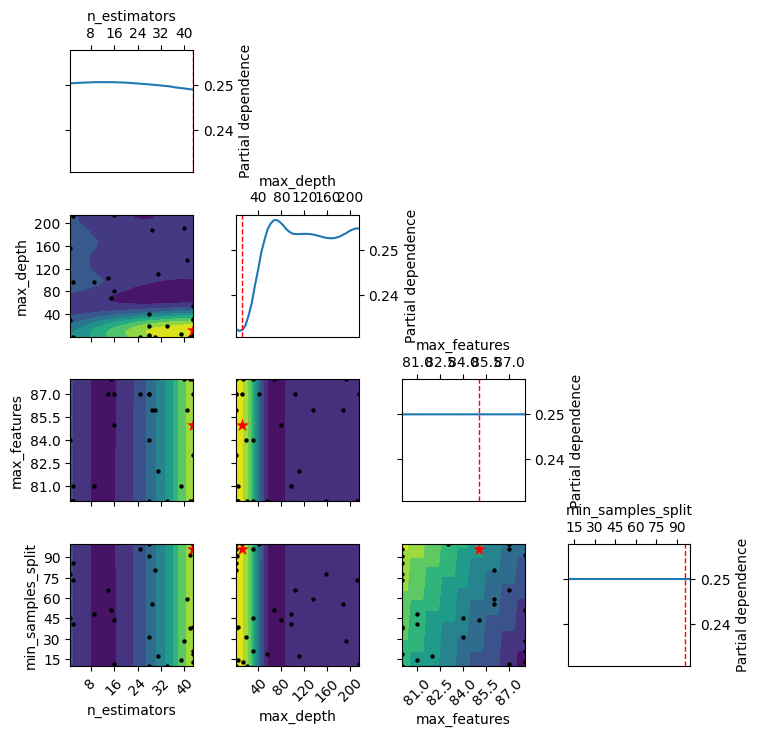

best_params =  OrderedDict([('max_depth', 43), ('max_features', 12), ('min_samples_split', 85), ('n_estimators', 96)])
best_score (RMSE)=  0.47322146640307894
RandomForestClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
3  RandomForestClassifier        0.902866        0.789260            0.472953
4  RandomForestClassifier        0.830212        0.792419            0.473172
2  DecisionTreeClassifier        0.774143        0.787906            0.488559
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0      LogisticRegression        0.747744        0.761282            0.503107


In [69]:
from skopt.space import Real, Categorical, Integer
forest_reg3 = RandomForestClassifier(random_state=0, bootstrap=False,criterion='entropy') 
parsDists = {'n_estimators': Integer(10, 100, 'uniform'), 
             'max_depth': Integer(1, x_train_balanced.shape[1], 'uniform'), 
              'max_features': Integer(1, 5*x_train_balanced.shape[1], 'uniform'), 
              'min_samples_split': Integer(80, int(.01*len(x_train_balanced)), 'uniform')}
forest_reg3 = getOptimalModelViaBayesSearchCv(forest_reg3, parsDists, x_train_balanced, y_train_balanced)
computeAccuracyAndRmseScores([forest_reg3])

### XGBoost via RandomizedSearchCV

* Seguiremos com a otimização de hiperparâmetros do modelo XGBoost via RandomizedSearchCV.   
Estes foram os melhores parâmetros indicados por esta otimização:
 

    Parametro  | Valor do Parametro
    --------- | ------   
    sampling_method | uniform  
    n_estimators | 10 
    min_child_weight | 3  
    max_depth | 43
    eta | 0.1  
    colsample_bytree | 0.5 
    booster |  gbtree 


* Um max_depth de tamanho 43 singifica  a limitação de profundidade da árvore, isto signifca que a árvore terá 43 niveis e isto signifca que será também mais complexa; este nivel  de profunidade também foi visto na otimização dos modelos anteriores de floresta de classificação.


* booster = gbtree é a técnica de boosting que o algoritmo utiliza para construir e combinar árvores de decisão, assim o gbtree signifca que está escolhendo o Gradient Boosted Trees como a técnica de boosting a ser usada.    


* O eta = 0.1 é a taxa de aprendizado, que controla o peso das árvores subsequentes; cada árvore adicionada ao modelo tem apenas 10% da contribuição e isto  implica que o modelo vai ajustar-se aos dados de forma mais lenta e gradual.   


* O sampling_method = uniform especifica a forma como os dados são amostrados durante o treinamento, ou seja, a abordagem de amostragem é da forma uniform.   

* O n_estimators igual a 10 significa que somente 10 árvores foram consideradas como uma quantidade adequada para atingir um bom equilíbrio entre precisão e capacidade de generalização para os dados, este valor pode ser considerado pequeno

* Esta otimização nos entrega uma acurácia de 0.981385 nos dados de treinamento e de nos dados de teste.   
Com isso vemos que a otimização do modelo XGBoost via RandomizedSearchCV tem um grande desempenho nos dados de treinamento sendo o melhor desempenho dos modelos otimizados nos dados de treinamento.   
Em comparação com o modelo de XGBoost sem otimização vemos que o desempenho do modelo otimizado nos dados de treinamento foi menor sendo 1 ponto menor pois o modelo sem otimizção estava com 0.995713 nos dados de teste, porém o modelo XGBoost sem otimização tem acurácia maior pois está em overfitting.     
Já nos dados de teste o modelo se mostra o pior em relação aos modelos otimizados anteriormente, e também pior em relação ao desempenho nos dados de teste do modelo sem otimização, sendo 0.03 pontos a menos pois o modelo XGBoost sem otimização tem acurácia de 0.748646 nos dados de teste.

In [70]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV 
XGBParamsGrid = { 'booster': ['gbtree','gblinear'],
                 'sampling_method' : ["uniform","gradient_based"],
                 'min_child_weight': [1,3],
                 'n_estimators':[10,15], 
                 'max_depth': [ 40, x_train_balanced.shape[1]], 
                 'eta': [.01, .1,0.9,0.7], 
                 'colsample_bytree': [.5, 1]
                 }
XGB_reg2 = xg.XGBRegressor( ) 
XGB_grid_search = RandomizedSearchCV(XGB_reg2, XGBParamsGrid, cv = 3, return_train_score = True, 
                               verbose=False, scoring = 'neg_mean_squared_error') 
XGB_grid_search.fit(x_train_balanced, y_train_balanced.values.ravel())
print('best_params= ', XGB_grid_search.best_params_)
print('best_score = ', -XGB_grid_search.best_score_)
XGB_reg2 = XGB_grid_search.best_estimator_
computeAccuracyAndRmseScores([XGB_reg2])

best_params=  {'sampling_method': 'uniform', 'n_estimators': 10, 'min_child_weight': 3, 'max_depth': 43, 'eta': 0.1, 'colsample_bytree': 0.5, 'booster': 'gbtree'}
best_score =  0.17624098229283436
XGBRegressor  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
5            XGBRegressor        0.981385        0.715253            0.419800
3  RandomForestClassifier        0.902866        0.789260            0.472953
4  RandomForestClassifier        0.830212        0.792419            0.473172
2  DecisionTreeClassifier        0.774143        0.787906            0.488559
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0      LogisticRegression        0.747744        0.761282            0.503107


### XGBoost via BayesSearchCV

* Seguiremos com a otimização de hiperparâmetros do modelo XGBoost via BayesSearchCV.   
Estes foram os melhores parâmetros indicados por esta otimização:
 

    Parametro  | Valor do Parametro
    --------- | ------   
    colsample_bytree | 0.01
    eta |  0.0928126251742723
    max_depth | 39 
    n_estimators | 93

* O eta = 0.0928126251742723 é a taxa de aprendizado, que controla o peso das árvores subsequentes; cada árvore adicionada ao modelo tem apenas 0.9% da contribuição e isto  implica que o modelo vai ajustar-se aos dados de forma mais lenta e gradual.   


* Um max_depth de tamanho 39 singifica a limitação de profundidade da árvore, isto signifca que a árvore terá 39 níveis e isto mostra que as árvores terão uma alta complexidade e que pode ser vista de forma mais complexa, esta profunidade é menos que as profundidades vistas anteriormente que tinham 43 de profundidade;   
  
 
* O n_estimators igual a 93 significa que 83 árvores foram consideradas como uma quantidade adequada para atingir um bom equilíbrio entre precisão e capacidade de generalização para os dados, este número é bem alto em relação ao modelo XGBoost otimizado anteriormente.    


* A acurácia deste modelo XGBoost via BayesSearchCV foi de 0.842735 nos dados de treinamento e de 0.708032 nos dados de teste.   
O desempenho nos dados de treinamento foi considerado melhor que os outros modelos anteriores,porém obteve uma acurácia pior que o modelo XGBoost otimizado anteriormente, tendo mais de 0.14 pontos de acurácia a menos que o modelo XGBoost otimizado e o XGBoost sem otimização.   
Já nos dados de teste o modelo se mostrou pior que o modelo XGBoost otimizado anteriormente, tendo 0.01 a mais de acurácia e sendo o pior modelo nos dados de teste . 

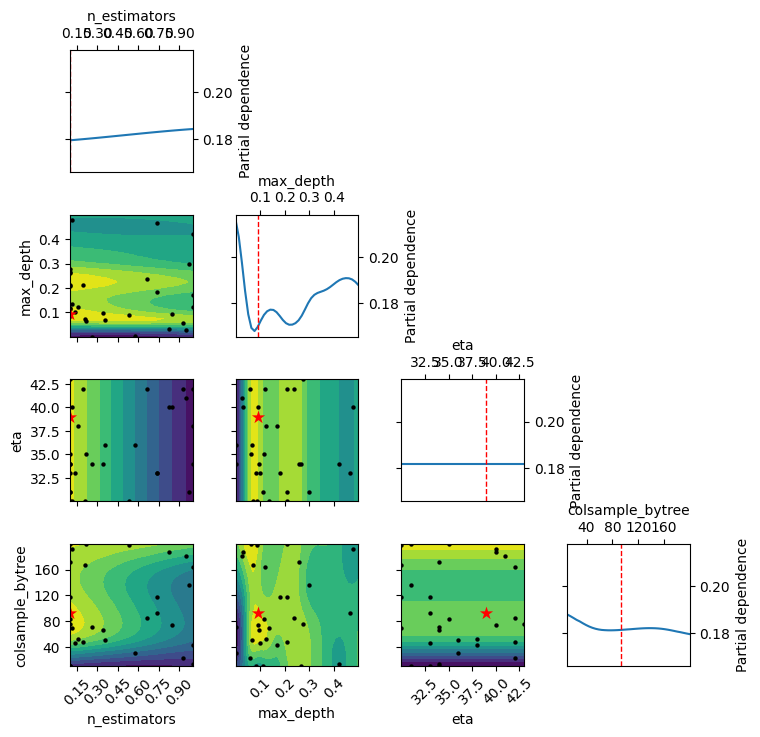

best_params =  OrderedDict([('colsample_bytree', 0.1), ('eta', 0.0928126251742723), ('max_depth', 39), ('n_estimators', 93)])
best_score (RMSE)=  0.3987262332653475
XGBRegressor  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
5            XGBRegressor        0.981385        0.715253            0.419800
3  RandomForestClassifier        0.902866        0.789260            0.472953
6            XGBRegressor        0.842735        0.708032            0.398710
4  RandomForestClassifier        0.830212        0.792419            0.473172
2  DecisionTreeClassifier        0.774143        0.787906            0.488559
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0      LogisticRegression        0.747744        0.761282            0.503107


In [71]:
import xgboost as xg
xgb_reg3 = getOptimalModelViaBayesSearchCv(modelObj=xg.XGBRegressor(booster='gbtree'),
                                        parsDists={
                                            'n_estimators': Integer(10, 200, 'uniform'), 
                                            'max_depth': Integer(30,43, 'uniform'), 
                                            'eta': Real(.001, .5, 'uniform'), 
                                            'colsample_bytree': Real(.1, 1, 'uniform')}, 
                                            x_train=x_train_balanced, y_train=y_train_balanced)
computeAccuracyAndRmseScores([xgb_reg3])

### Artificial Neural Network (ANN) via RandomizedSearchCV

* Seguiremos com a otimização de hiperparâmetros do modelo de ANN via RandomizedSearchCV.   
Estes foram os melhores parâmetros indicados por esta otimização:
 

    Parametro  | Valor do Parametro
    --------- | ------   
    solver | sgd
    shuffle | False
    power_t | 0.9 
    max_iter | 200
    learning_rate_init | 0.01
    activation | logistic



* O tamanho max_iter de 200 significa que o algoritmo de treinamento da rede neural será executado por, no máximo, 200 iterações.  Este número pode ser considerado grande visto o tamanho do conjunto de dados que é bem volumoso.   


* learning_rate_init é definido como 0.01, isso significa que a taxa de aprendizado inicial é 0.01, o que pode ser considerado uma taxa de aprendizado lenta e com ajustes relativamente pequenos e também indica que no início do treinamento, os pesos da rede serão ajustados em passos que são 1% do valor do gradiente da função de perda.    


* O solver igual a sgd significa que o algoritmo de otimização utilizado para treinar o modelo é o Stochastic Gradient Descent (Gradiente Descendente Estocástico), o SGD é uma variação do gradiente descendente tradicional, onde os pesos da rede são atualizados após cada exemplo de treinamento (ou um pequeno lote de exemplos, chamado mini-batch) em vez de usar o conjunto de dados inteiro.


* O modelo nos entregou uma acurácia de 0.806069 nos dados de treinamento e 0.774368 nos dados de teste.    
O modelo otimizado não teve grande desempenho e não esta entre os modelos com maiores acurácia nos dados de treinamento, porém teve um maior desempenho que os modelos de arvóre de decisão que foram otimizados.    
Já nos dados de teste  o modelo teve desempenho satisfátorio sendo melhor que os modelos de XGBoost otimizado, porém o seu desempenho foi bem semelhante aos dados de treino no modelo ANN sem otimização.      

In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 
ANNParamsGrid = { 'activation': [ 'logistic', 'tanh'],
                'solver': ['lbfgs', 'sgd'],
                'learning_rate_init' : [0.01,0.7,0.1],
                'power_t':  [0.5,0.6,0.9],
                'max_iter': [150,200,225],
                'shuffle': [True, False],
                 }
ANN_reg2 = MLPClassifier() 
ANN_grid_search = RandomizedSearchCV(ANN_reg2, ANNParamsGrid, cv = 3, return_train_score = True, 
                               verbose=False, scoring = 'neg_mean_squared_error') 
ANN_grid_search.fit(x_train_balanced, y_train_balanced.values.ravel())
print('best_params= ', ANN_grid_search.best_params_)
print('best_score = ', -ANN_grid_search.best_score_)
ANN_reg2 = ANN_grid_search.best_estimator_
computeAccuracyAndRmseScores([ANN_reg2])

best_params=  {'solver': 'sgd', 'shuffle': False, 'power_t': 0.9, 'max_iter': 200, 'learning_rate_init': 0.1, 'activation': 'logistic'}
best_score =  0.23476968336833134
MLPClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
5            XGBRegressor        0.981385        0.715253            0.419800
3  RandomForestClassifier        0.902866        0.789260            0.472953
6            XGBRegressor        0.842735        0.708032            0.398710
4  RandomForestClassifier        0.830212        0.792419            0.473172
7           MLPClassifier        0.806069        0.774368            0.488442
2  DecisionTreeClassifier        0.774143        0.787906            0.488559
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0      LogisticRegression        0.747744        0.761282      

### Artificial Neural Network (ANN) via BayesSearchCV

* Seguiremos com a otimização de hiperparâmetros do modelo ANN via BayesSearchCV.   
Estes foram os melhores parâmetros indicados por esta otimização:
 

    Parametro  | Valor do Parametro
    --------- | ------ 
    learning_rate_init | 0.01
    max_iter | 160
    power_t | 0.9924406176642826

* O tamanho max_iter de 160 significa que o algoritmo de treinamento da rede neural será executado por, no máximo, 160 iterações sendo maior que a otimização do modelo ANN via RandomizedSearchCV. 

* learning_rate_init é definido como 0.01, isso significa que a taxa de aprendizado inicial é 0.01, o que pode ser considerado uma taxa de aprendizado lenta e com ajustes relativamente pequenos e também indica que no início do treinamento, os pesos da rede serão ajustados em passos que são 1% do valor do gradiente da função de perda.    


* O power_t  igual a 0.9924406176642826 pode ajudar a estabilizar o treinamento, pois a taxa de aprendizado maior no início permite que o modelo faça ajustes mais significativos nos pesos, enquanto a diminuição progressiva da taxa de aprendizado ajuda a evitar que o modelo oscile ou pule sobre mínimos locais conforme se aproxima da convergência.


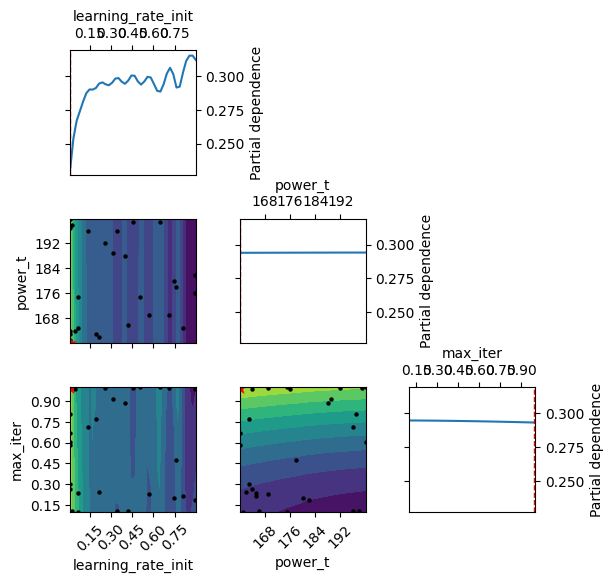

best_params =  OrderedDict([('learning_rate_init', 0.01), ('max_iter', 160), ('power_t', 0.9924406176642826)])
best_score (RMSE)=  0.47631115531417995
MLPClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  teste_accuracy  cv_train_rmse_mean
5            XGBRegressor        0.981385        0.715253            0.419800
3  RandomForestClassifier        0.902866        0.789260            0.472953
6            XGBRegressor        0.842735        0.708032            0.398710
4  RandomForestClassifier        0.830212        0.792419            0.473172
8           MLPClassifier        0.810469        0.768051            0.480534
7           MLPClassifier        0.806069        0.774368            0.488442
2  DecisionTreeClassifier        0.774143        0.787906            0.488559
1  DecisionTreeClassifier        0.750226        0.767148            0.506699
0   

In [73]:
from sklearn.neural_network import MLPClassifier
ANN_reg3 = getOptimalModelViaBayesSearchCv(modelObj=MLPClassifier(solver='sgd',shuffle= False,activation= 'tanh'),
                parsDists={
                'learning_rate_init' : Real(0.01,0.9,'uniform'),
                'power_t':  Real(0.1,1,'uniform'),
                'max_iter': Integer(160,200,'uniform')},
                x_train=x_train_balanced, y_train=y_train_balanced)
computeAccuracyAndRmseScores([ANN_reg3])

## Medidas de desempenho

* Abaixo veremos as medidas de desempenho para os modelos balanceados, consideramos os modelos balanceados pois conforme visto anteriormete os modelos sem balanceamento tem um desempenho muito ruim.   
Assim, considerando os modelos balanceados teremos maior aprovitamente e veremos o desempenho de cada modelo.    
Estas medidas de desempenho ficaram como ultimo topico pois servirão de análise de desempenho dos modelos.  

* Usaremos as medidas de errode recall e precision, elas tem um grande signifcado no desempenho do modelo.   

* Valor alto de precision: Indica que o modelo tem uma baixa taxa de falsos positivos, ou seja, a maioria das previsões positivas são realmente positivas indicando que  o paciente que o modelo previu corretamente como vivo.
    
* Valor baixo de precision: Indica que o modelo tem uma alta taxa de falsos positivos, significando que muitas das previsões positivas são na verdade negativas indica que pacientes que o modelo previu como vivo quando devia classificar como óbito.     

* Alto Recall: Um alto valor de recall indica que o modelo é capaz de identificar a maioria dos exemplos positivos, ou seja, poucos positivos são classificados incorretamente como negativos indicando que o modelo previu corretamente os pacientes como óbito.
* Baixo Recall: Um baixo valor de recall indica que o modelo está falhando em identificar muitos exemplos positivos, resultando em muitos falsos negativos indicando que os pacientes que o modelo previu como óbito quando devia classificar como vivo.

### Logistic Regression

* Abaixo veremos o modelo de regressão logistica e suas configurações.

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1.5,solver='saga') 
log_reg.fit(x_train_balanced, y_train_balanced)
y_pred = [y_p for y_p in log_reg.predict(x_train_balanced)]
y_test_predictions = [round(y_hat) for y_hat in log_reg.predict(x_teste_balanced)]

* Conforme visto anteriormente o modelo de regressão logistica nos entrega uma acurácia de 0.747744 nos dados de treinamento e 0.761282 nos dados de teste.   
O modelo entregou um desempenho semelhante em ambos os dados, isto significa que o modelo de regressão logistica conseguiu se adaptar razoavelemente em ambos os dados.   
As medidas de desempenho precision, recall e mae nos mostra dados interessantes.   
A medida precision é mais alta que a medida recall, isto signifca que o modelo tem melhor desempenho ao rotular pacientes que continuaram vivos e o recall mais baixo mostra que o modelo não consegue rotular bem pacientes que foram a óbito.

In [75]:
y_test_predictions = [round(y_hat) for y_hat in log_reg.predict(x_teste_balanced)]
printPerformanceMeasures(model= log_reg)

 --------------------------- Acuracy for balanced models  --------------------------- 


,model,train_accuracy,teste_acuracy,recall,precision
0,LogisticRegression,0.747744,0.761282,0.723827,0.782439


### Decision Tree Classifier

* A seguir veremos o modelo de árvore de decisão.  

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5) 
tree_reg.fit(x_train_balanced, y_train_balanced)
y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_train_balanced)]
y_test_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_teste_balanced)]

* Conforme pode ser visto abaixo o modelo possui um bom desempenho nos dados de treinamento mas ao olhar o desempenho nos dados de teste pode-se afirmar que o modelo está em possível overfitting pois nos dados de treinamento o modelo não agiu de forma tão satisfatória.    
É visto que nos dados de treino o modelo teve pior desempenho que o modelo de regressão logistica visto anteriormente.    
A partir da medida de precision pode ve-se que o modelo tem bom desepenho ao rotular pacientes que estão vivos mas pela  medida recall ver-se que o mdelo tem pessimo desempenho ao tentar rotular aqueles pacientes que foram a óbito e por isto o modelo tem um desempenho que pode ser considerado ruim.     
Além disso, com um recall menor perdemos informações relevantes ao prever pacientes mortos como vivos, e assim deixamos de cuidar de pacientes que estão em estado crítico. 

In [77]:
printPerformanceMeasures(model = tree_reg)

 --------------------------- Acuracy for balanced models  --------------------------- 


,model,train_accuracy,teste_acuracy,recall,precision
0,DecisionTreeClassifier,0.961643,0.723375,0.690433,0.73913


### Random forest Classifier

* A seguir veremos  o desempenho do modelo de floresta de classificação.   

In [78]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(random_state=0, min_samples_split = 20, 
                     n_estimators=150,criterion= 'entropy',max_features= 'log2') 
forest_reg.fit(x_train_balanced, y_train_balanced)
y_train_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_train_balanced)]
y_test_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_teste_balanced)]

* O modelo de floresta de classificação foi o modelo com melhor desempenho prevendo corretamente os casos de pacientes vivos e mortos tanto nos dados de treinamento quanto nos dados de teste.   
Os dados de precision e recall não possuem tanta diferença um do outro sendo somente a medida precision sendo aproximadamente 0.01 pontos menor, a medida de precision sendo menor pode indicar tratamentos mais intensivos em pacientes que não precisavam e que permaneceriam vivos, porém este tratamento não é tão prejudicial já que o paciente permanece vivo.    
Com os valores de precision e recall próximos mostra que o modelo não previu uma classe a mais que a outra conseguindo distinguir bem os valores.   
O modelo é o considerado com melhor desempenho pois é o modelo com melhor acurácia nos dados de teste, e além disso tem as maiores medidas de precision e recall.   

In [79]:
printPerformanceMeasures(model= forest_reg)

 --------------------------- Acuracy for balanced models  --------------------------- 


,model,train_accuracy,teste_acuracy,recall,precision
0,RandomForestClassifier,0.855257,0.78926,0.793321,0.786929


### XGBoost Regression

* Ja o modelo de xgboost se mostra muito bom, porém isso so ocorre nos dados de treinamento do modelo, nos dados de teste o modelo tem um desempenho muito pior em comparação com os dados de treinamento.  
Além disso, o modelo não se mostra melhor que o modelo de floresta de classificação definido anteriormente.     

In [80]:
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='binary:logistic', n_estimators = 100,
                            seed = 0, max_depth = x_train_balanced.shape[1])
xgb_reg.fit(x_train_balanced, y_train_balanced)
y_pred = [y_p for y_p in xgb_reg.predict(x_train_balanced)]
y_train_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_train_balanced)]
y_test_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_teste_balanced)]

* Conforme dito anteriormente o modelo tem ótimo desempenho nos dados de treinamento, porém este modelo perde desempenho nos dados de teste o que indica um overfitting do modelo.   
As medidas de precision e recall não possui tantas semelhanças em seus valores, a medida de recall é mais alta indicando que o modelo previu corretamente os pacientes como óbito.   
já o valor mais baixo de precision mostra que pacientes que o modelo previu como vivo deveria classificar como óbito, isto não tem grandes complicações pois so mostra um tratamento que foi feito de forma desnecessária mas que não houve nenhuma perca.

In [81]:
printPerformanceMeasures(model = xgb_reg)

 --------------------------- Acuracy for balanced models  --------------------------- 


,model,train_accuracy,teste_acuracy,recall,precision
0,XGBRegressor,0.995713,0.748646,0.771661,0.737705


### Artificial Neural Network (ANN)

* A seguir veremos o modelo de redes Neurais Artificiais (ANN), este modelo possui um ótimo desempenho assemelhando-se muito ao melhor modelo visto ate agora.  

In [82]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier(random_state=0, hidden_layer_sizes=(200), learning_rate_init=0.05, learning_rate='constant',
                        activation='relu', max_iter=1000)
ann_clf.fit(x_train_balanced, y_train_balanced)
y_train_predictions = ann_clf.predict(x_train_balanced)
y_test_predictions = ann_clf.predict(x_teste_balanced)

* As medidas de desempenho do modelo de ANN foram bem semelhante, a acurácia nos dados de treino e nos dados de teste foram bem parecidas com uma diferença de 0.02 a menos nos dados de teste. Isto indica um modelo que não decora dados de treinamento.   
As medidas de recall e precision também tem um desempenho semelhante com somente a precision sendo menor em aproximadmente 0.01 pontos.    
A medida de precision sendo menor indica um bom modelo, que não tem grandes erros ao tentar classificar pacientes como morto.    

In [83]:
printPerformanceMeasures(model = ann_clf)

 --------------------------- Acuracy for balanced models  --------------------------- 


,model,train_accuracy,teste_acuracy,recall,precision
0,MLPClassifier,0.796367,0.779783,0.782491,0.778276


# 4 Limitações deste estudo

---> Como limitações desse estudo podemos destacar:  
- Se faz necessário um aprofundamento melhor sobre balanceamento de dados;
- Um melhor aprofundamento em modelos de machine learning;

# 5 Referências

* Para se ter os valores de sinais vitais para idosos:  
1- [http://hospitaldocoracaoms.com.br/blog/monitoramento-dos-sinais-vitais-covid-19/- #:~:text=O%20Minist%C3%A9rio%20da%20Sa%C3%BAde%20estabeleceu,entre%2060%20e%2090%20mmHg.  ](http://hospitaldocoracaoms.com.br/blog/monitoramento-dos-sinais-vitais-covid-19/#:~:text=O%20Minist%C3%A9rio%20da%20Sa%C3%BAde%20estabeleceu,entre%2060%20e%2090%20mmHg.)  
2- https://telemedicinamorsch.com.br/blog/sinais-vitais

* Para consulta e aprendizado:  
1-  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition.  
2- https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b
